Thinkful Supervised Learning Capstone

Author: Keith Laskay, klaskay@gmail.com

Date: 06-12-18

Dataset
https://www.kaggle.com/c/home-credit-default-risk

# Home Credit Default Risk

The flow of capital is one of the biggest determining factors in the quality of life of a region. A well established monetary system allows for capital to easily flow allowing individuals to make large purchases or start a business. In many developing areas, there is a lack of banks which has lead to slow economic development. The lack of banks leads to would-be borrowers having an insufficient credit history, which perpetuates the cycle. 

 “Founded in 1997, Home Credit Group is an international consumer finance provider with operations in 11 countries. We focus on responsible lending primarily to people with little or no credit history.” The 11 countries where Home Credit operates are Belarus, Czech Republic, China, India, Indonesia, Kazakhstan, Philippines,  Russian Federation, Slovakia, United States of America, and Vietnam. 

The goal of this project is to build a model to predict an applicant's ability to repay a loan as well as provide a good experience for the borrower to encourage them to continue to use banking products and services. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from xgboost.sklearn import XGBClassifier

/home/keithlaskay/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/keithlaskay/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


## Importing Dataset

In [2]:
df = pd.read_csv('./data/application_train.csv')

In [3]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df.drop_duplicates(inplace=True)

In [5]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 288.6+ MB


In [7]:
df.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OWN_CAR_AGE                   202929
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
F

In [8]:
eda = df.copy() # keeping original dataframe intact

In [9]:
eda.NAME_CONTRACT_TYPE.value_counts()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

In [10]:
loan_dif = eda['TARGET'].value_counts()[1] # not funded
loan_dif

24825

In [11]:
approved = eda['TARGET'].value_counts()[0] # funded
approved

282686

In [12]:
#  Percent unable to repay
loan_dif / (loan_dif + approved)

0.08072881945686496

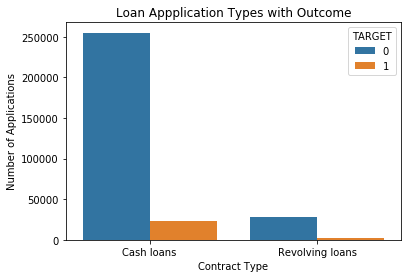

In [13]:
sns.countplot(x='NAME_CONTRACT_TYPE', data=eda, hue = 'TARGET')
plt.title('Loan Appplication Types with Outcome')
plt.xlabel('Contract Type')
plt.ylabel('Number of Applications');

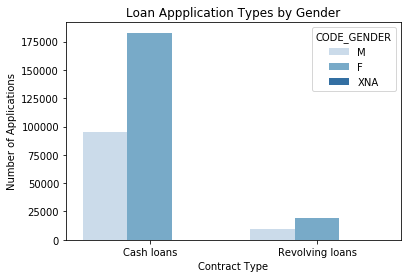

In [14]:
sns.countplot(x='NAME_CONTRACT_TYPE', data=eda, hue = 'CODE_GENDER', palette='Blues')
plt.title('Loan Appplication Types by Gender')
plt.xlabel('Contract Type')
plt.ylabel('Number of Applications');

In [15]:
eda.CODE_GENDER.value_counts() # applicants by gender

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [16]:
eda.shape[0]

307511

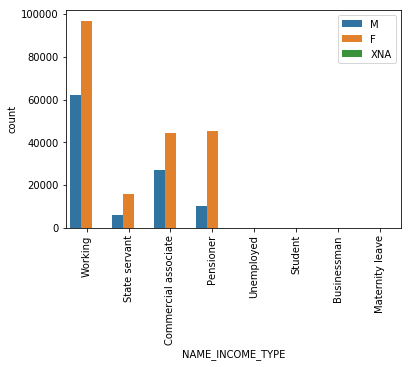

In [17]:
sns.countplot(eda.NAME_INCOME_TYPE, hue=eda.CODE_GENDER)
plt.xticks(rotation=90)
plt.legend(loc=1);

In [18]:
eda.groupby('NAME_INCOME_TYPE').TARGET.mean().sort_values() 
# percent of applicants denied credit by occupation

NAME_INCOME_TYPE
Businessman             0.000000
Student                 0.000000
Pensioner               0.053864
State servant           0.057550
Commercial associate    0.074843
Working                 0.095885
Unemployed              0.363636
Maternity leave         0.400000
Name: TARGET, dtype: float64

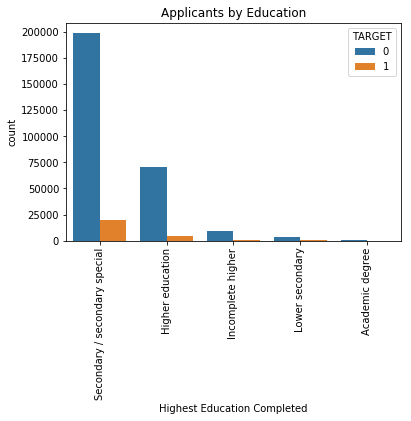

In [19]:
sns.countplot(eda.NAME_EDUCATION_TYPE, hue=eda.TARGET)
plt.xticks(rotation=90)
plt.title('Applicants by Education')
plt.xlabel('Highest Education Completed');

/home/keithlaskay/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


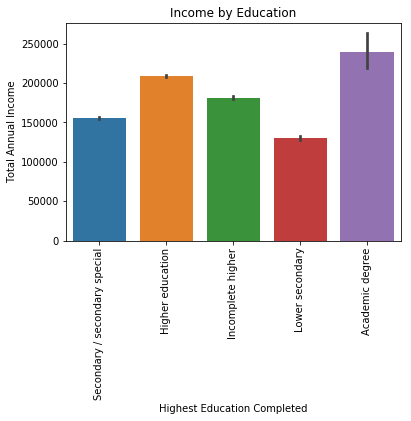

In [20]:
sns.barplot(eda.NAME_EDUCATION_TYPE, eda.AMT_INCOME_TOTAL)
plt.title('Income by Education')
plt.xticks(rotation=90)
plt.xlabel('Highest Education Completed')
plt.ylabel('Total Annual Income');

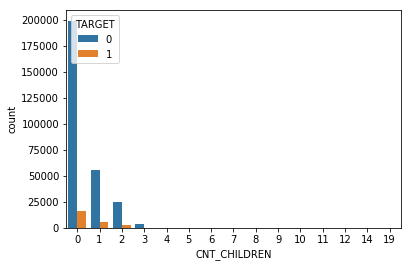

In [21]:
sns.countplot(eda.CNT_CHILDREN, hue=eda.TARGET)

In [22]:
eda.groupby('CNT_CHILDREN').TARGET.mean() 
# denial rate by number of children

CNT_CHILDREN
0     0.077118
1     0.089236
2     0.087218
3     0.096314
4     0.128205
5     0.083333
6     0.285714
7     0.000000
8     0.000000
9     1.000000
10    0.000000
11    1.000000
12    0.000000
14    0.000000
19    0.000000
Name: TARGET, dtype: float64

In [23]:
eda.CNT_CHILDREN.value_counts().sort_index() 
# count of rhildren per applcant

0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
8          2
9          2
10         2
11         1
12         2
14         3
19         2
Name: CNT_CHILDREN, dtype: int64

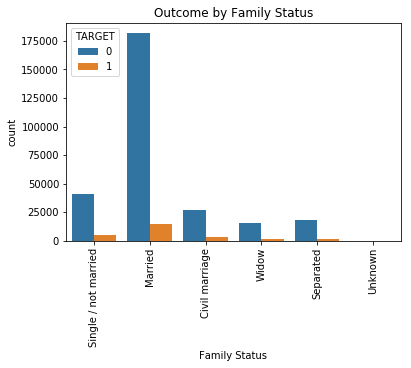

In [24]:
sns.countplot(eda.NAME_FAMILY_STATUS, hue=eda.TARGET)
plt.title('Outcome by Family Status')
plt.xticks(rotation=90)
plt.xlabel('Family Status');

In [25]:
eda.groupby('NAME_FAMILY_STATUS').TARGET.mean().sort_values()

NAME_FAMILY_STATUS
Unknown                 0.000000
Widow                   0.058242
Married                 0.075599
Separated               0.081942
Single / not married    0.098077
Civil marriage          0.099446
Name: TARGET, dtype: float64

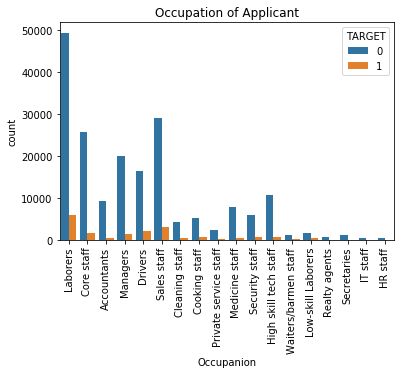

In [26]:
sns.countplot(eda.OCCUPATION_TYPE, hue=eda.TARGET)
plt.title('Occupation of Applicant')
plt.xticks(rotation=90)
plt.xlabel('Occupanion');

## Cleaning of data 

In [27]:
# columns with null values
cols = eda.isnull().sum().sort_values(ascending=False) 
counter = 0
for idx, val in cols.items():
    if val > 0:
        print(idx, val)
        counter += 1
print(counter)

COMMONAREA_MEDI 214865
COMMONAREA_AVG 214865
COMMONAREA_MODE 214865
NONLIVINGAPARTMENTS_MODE 213514
NONLIVINGAPARTMENTS_MEDI 213514
NONLIVINGAPARTMENTS_AVG 213514
FONDKAPREMONT_MODE 210295
LIVINGAPARTMENTS_MEDI 210199
LIVINGAPARTMENTS_MODE 210199
LIVINGAPARTMENTS_AVG 210199
FLOORSMIN_MEDI 208642
FLOORSMIN_MODE 208642
FLOORSMIN_AVG 208642
YEARS_BUILD_MEDI 204488
YEARS_BUILD_AVG 204488
YEARS_BUILD_MODE 204488
OWN_CAR_AGE 202929
LANDAREA_MODE 182590
LANDAREA_AVG 182590
LANDAREA_MEDI 182590
BASEMENTAREA_MEDI 179943
BASEMENTAREA_AVG 179943
BASEMENTAREA_MODE 179943
EXT_SOURCE_1 173378
NONLIVINGAREA_MEDI 169682
NONLIVINGAREA_AVG 169682
NONLIVINGAREA_MODE 169682
ELEVATORS_MODE 163891
ELEVATORS_AVG 163891
ELEVATORS_MEDI 163891
WALLSMATERIAL_MODE 156341
APARTMENTS_MODE 156061
APARTMENTS_AVG 156061
APARTMENTS_MEDI 156061
ENTRANCES_MEDI 154828
ENTRANCES_MODE 154828
ENTRANCES_AVG 154828
LIVINGAREA_MEDI 154350
LIVINGAREA_MODE 154350
LIVINGAREA_AVG 154350
HOUSETYPE_MODE 154297
FLOORSMAX_MODE 153020
F

In [28]:
initial_drop = [k for k,v  in cols.items() if v > 100000] 
# list of features with more than 100k null values

In [29]:
eda.drop(initial_drop, axis= 1, inplace=True) 
# drop features with more than 100k null values

In [30]:
eda.isnull().sum().sort_values(ascending=False) # remaining columns 

OCCUPATION_TYPE                96391
EXT_SOURCE_3                   60965
AMT_REQ_CREDIT_BUREAU_YEAR     41519
AMT_REQ_CREDIT_BUREAU_MON      41519
AMT_REQ_CREDIT_BUREAU_WEEK     41519
AMT_REQ_CREDIT_BUREAU_DAY      41519
AMT_REQ_CREDIT_BUREAU_HOUR     41519
AMT_REQ_CREDIT_BUREAU_QRT      41519
NAME_TYPE_SUITE                 1292
OBS_30_CNT_SOCIAL_CIRCLE        1021
DEF_30_CNT_SOCIAL_CIRCLE        1021
OBS_60_CNT_SOCIAL_CIRCLE        1021
DEF_60_CNT_SOCIAL_CIRCLE        1021
EXT_SOURCE_2                     660
AMT_GOODS_PRICE                  278
AMT_ANNUITY                       12
CNT_FAM_MEMBERS                    2
DAYS_LAST_PHONE_CHANGE             1
NAME_INCOME_TYPE                   0
FLAG_OWN_REALTY                    0
TARGET                             0
FLAG_EMAIL                         0
FLAG_PHONE                         0
FLAG_CONT_MOBILE                   0
NAME_CONTRACT_TYPE                 0
FLAG_WORK_PHONE                    0
FLAG_EMP_PHONE                     0
F

In [31]:
eda.OCCUPATION_TYPE.fillna(value='Other', inplace=True) 
# fill null occupation type with other

In [32]:
eda.EXT_SOURCE_3.mean()

0.5108529061800121

In [33]:
eda.EXT_SOURCE_3.std()

0.19484436446376072

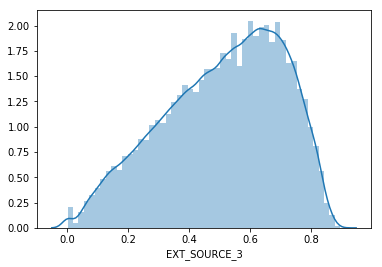

In [34]:
sns.distplot(eda.EXT_SOURCE_3.dropna());

In [35]:
eda.drop('EXT_SOURCE_3', axis=1, inplace=True) # drop EXT_SOURCE_3

In [36]:
eda.AMT_REQ_CREDIT_BUREAU_DAY.value_counts()
print(eda.AMT_REQ_CREDIT_BUREAU_DAY.mean())
print(eda.AMT_REQ_CREDIT_BUREAU_DAY.std())

0.0070002105326475985
0.11075740632418819


In [37]:
headers = ['AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_REQ_CREDIT_BUREAU_MON', 
           'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_DAY',
           'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_QRT']

In [38]:
for x in headers:
    print('{}     mean: {}      standard deviation: {}'.format(x, eda[x].mean(), eda[x].std()))

AMT_REQ_CREDIT_BUREAU_YEAR     mean: 1.899974435321363      standard deviation: 1.869294998182222
AMT_REQ_CREDIT_BUREAU_MON     mean: 0.26739526000781977      standard deviation: 0.9160023961540442
AMT_REQ_CREDIT_BUREAU_WEEK     mean: 0.0343619356973142      standard deviation: 0.20468487581284914
AMT_REQ_CREDIT_BUREAU_DAY     mean: 0.0070002105326475985      standard deviation: 0.11075740632418819
AMT_REQ_CREDIT_BUREAU_HOUR     mean: 0.006402448193930645      standard deviation: 0.08384912844777125
AMT_REQ_CREDIT_BUREAU_QRT     mean: 0.26547414959848414      standard deviation: 0.7940556483196873


In [39]:
eda.drop(headers, axis=1, inplace=True) # drop columns with AMT_REQ

In [40]:
eda.isnull().sum().sort_values(ascending=False) # remaining columns sorted by null values

NAME_TYPE_SUITE                1292
DEF_60_CNT_SOCIAL_CIRCLE       1021
OBS_60_CNT_SOCIAL_CIRCLE       1021
DEF_30_CNT_SOCIAL_CIRCLE       1021
OBS_30_CNT_SOCIAL_CIRCLE       1021
EXT_SOURCE_2                    660
AMT_GOODS_PRICE                 278
AMT_ANNUITY                      12
CNT_FAM_MEMBERS                   2
DAYS_LAST_PHONE_CHANGE            1
FLAG_MOBIL                        0
FLAG_EMP_PHONE                    0
FLAG_WORK_PHONE                   0
DAYS_REGISTRATION                 0
FLAG_CONT_MOBILE                  0
FLAG_PHONE                        0
FLAG_EMAIL                        0
OCCUPATION_TYPE                   0
DAYS_ID_PUBLISH                   0
FLAG_DOCUMENT_21                  0
DAYS_EMPLOYED                     0
REGION_RATING_CLIENT              0
REGION_POPULATION_RELATIVE        0
NAME_HOUSING_TYPE                 0
NAME_FAMILY_STATUS                0
NAME_EDUCATION_TYPE               0
NAME_INCOME_TYPE                  0
AMT_CREDIT                  

In [41]:
eda.NAME_TYPE_SUITE.value_counts() # breakdown of people present at time of application

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [42]:
eda.NAME_TYPE_SUITE.fillna('Other_C', inplace=True) # fill NAME_TYPE_SUITE with Other_C

In [43]:
soc = ['DEF_60_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_30_CNT_SOCIAL_CIRCLE']

In [44]:
for x in soc:
    print('{}     mean: {}      standard deviation: {}'.format(x, eda[x].mean(), eda[x].std()))

DEF_60_CNT_SOCIAL_CIRCLE     mean: 0.10004894123788705      standard deviation: 0.36229080397523755
OBS_60_CNT_SOCIAL_CIRCLE     mean: 1.4052921791901856      standard deviation: 2.3798033519768955
DEF_30_CNT_SOCIAL_CIRCLE     mean: 0.1434206662533851      standard deviation: 0.4466984293825373
OBS_30_CNT_SOCIAL_CIRCLE     mean: 1.4222454239942575      standard deviation: 2.400988746111826


In [45]:
for x in soc:    # fill soc columns with mean of column
    eda[x].fillna(eda[x].mean(), inplace=True)

In [46]:
eda.isnull().sum().sort_values(ascending=False)

EXT_SOURCE_2                   660
AMT_GOODS_PRICE                278
AMT_ANNUITY                     12
CNT_FAM_MEMBERS                  2
DAYS_LAST_PHONE_CHANGE           1
DAYS_REGISTRATION                0
DAYS_ID_PUBLISH                  0
FLAG_MOBIL                       0
FLAG_EMP_PHONE                   0
FLAG_DOCUMENT_21                 0
DAYS_BIRTH                       0
FLAG_WORK_PHONE                  0
FLAG_CONT_MOBILE                 0
FLAG_PHONE                       0
FLAG_EMAIL                       0
OCCUPATION_TYPE                  0
REGION_RATING_CLIENT             0
DAYS_EMPLOYED                    0
REGION_POPULATION_RELATIVE       0
WEEKDAY_APPR_PROCESS_START       0
NAME_HOUSING_TYPE                0
NAME_FAMILY_STATUS               0
NAME_EDUCATION_TYPE              0
NAME_INCOME_TYPE                 0
NAME_TYPE_SUITE                  0
AMT_CREDIT                       0
AMT_INCOME_TOTAL                 0
CNT_CHILDREN                     0
FLAG_OWN_REALTY     

In [47]:
eda.EXT_SOURCE_2.fillna(eda.EXT_SOURCE_2.mean(), inplace=True) 
# fill EXT_SOURCE_2 with its mean

In [48]:
eda.dropna(how='any', inplace=True) # drop remaining rows with nulls

## Feature Selection and Enginering

In [49]:
eda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307220 entries, 0 to 307510
Data columns (total 66 columns):
SK_ID_CURR                     307220 non-null int64
TARGET                         307220 non-null int64
NAME_CONTRACT_TYPE             307220 non-null object
CODE_GENDER                    307220 non-null object
FLAG_OWN_CAR                   307220 non-null object
FLAG_OWN_REALTY                307220 non-null object
CNT_CHILDREN                   307220 non-null int64
AMT_INCOME_TOTAL               307220 non-null float64
AMT_CREDIT                     307220 non-null float64
AMT_ANNUITY                    307220 non-null float64
AMT_GOODS_PRICE                307220 non-null float64
NAME_TYPE_SUITE                307220 non-null object
NAME_INCOME_TYPE               307220 non-null object
NAME_EDUCATION_TYPE            307220 non-null object
NAME_FAMILY_STATUS             307220 non-null object
NAME_HOUSING_TYPE              307220 non-null object
REGION_POPULATION_RELATI

In [50]:
eda['FLAG_OWN_CAR'] = eda.FLAG_OWN_CAR.map({'N':0, 'Y':1}) 
# change to numeric 

In [51]:
eda['FLAG_OWN_REALTY'] = eda.FLAG_OWN_REALTY.map({'N':0, 'Y':1}) 
# change to numeric 

In [52]:
eda['CODE_GENDER'] = eda.CODE_GENDER.map({'M': 0, 'F':1, 'XNA':0 }) 
# change to numeric 

In [53]:
eda['NAME_CONTRACT_TYPE'] = eda['NAME_CONTRACT_TYPE'].map(
    {'Cash loans': 0, 'Revolving loans': 1}) 
# change to numeric 

In [54]:
flags = [name for name in eda.columns if 'FLAG' in name] 
# list of all flag columns

In [55]:
eda['FLAG_TOTAL'] = eda[flags].sum(axis=1) # column with sum of all flag columns

In [56]:
eda.drop(flags, inplace=True, axis=1) # drop individual flag features

In [57]:
eda.corr()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_TOTAL
SK_ID_CURR,1.000000,-0.002080,0.001318,0.000786,-0.001212,-0.001783,-0.000247,-0.000286,-0.000257,0.000910,...,-0.001939,-0.001565,0.000125,0.002380,-0.001389,-0.000091,-0.001405,0.001200,-0.000924,0.000868
TARGET,-0.002080,1.000000,-0.030994,-0.054847,0.019216,-0.003963,-0.030391,-0.012819,-0.039648,-0.037208,...,0.044487,0.050991,0.032490,-0.160403,0.009066,0.032160,0.008974,0.031184,0.055278,0.009570
NAME_CONTRACT_TYPE,0.001318,-0.030994,1.000000,0.008612,0.029745,-0.003084,-0.220475,-0.240188,-0.185855,0.027524,...,0.013538,0.004180,-0.005360,0.016039,-0.018565,-0.008472,-0.018729,-0.006509,0.062032,-0.218025
CODE_GENDER,0.000786,-0.054847,0.008612,1.000000,-0.047433,-0.074695,-0.021540,-0.076951,-0.022520,-0.014014,...,-0.048251,-0.137494,-0.133172,0.014642,0.007272,0.017843,0.007179,0.014601,-0.025291,-0.194276
CNT_CHILDREN,-0.001212,0.019216,0.029745,-0.047433,1.000000,0.012933,0.002311,0.021604,-0.001830,-0.025479,...,0.020119,0.070664,0.069903,-0.018000,0.015575,-0.001240,0.015215,-0.001806,-0.005814,0.131361
AMT_INCOME_TOTAL,-0.001783,-0.003963,-0.003084,-0.074695,0.012933,1.000000,0.156724,0.191512,0.159607,0.074736,...,0.003592,0.006414,0.008267,0.060908,-0.013096,-0.013198,-0.013014,-0.013092,-0.018593,0.063893
AMT_CREDIT,-0.000247,-0.030391,-0.220475,-0.021540,0.002311,0.156724,1.000000,0.769941,0.986968,0.099606,...,-0.026848,-0.018761,0.000201,0.131183,0.000160,-0.021176,0.000206,-0.023696,-0.073750,0.127115
AMT_ANNUITY,-0.000286,-0.012819,-0.240188,-0.076951,0.021604,0.191512,0.769941,1.000000,0.775110,0.118306,...,-0.006156,0.001042,0.010249,0.125740,-0.011990,-0.022736,-0.011738,-0.023884,-0.063791,0.163573
AMT_GOODS_PRICE,-0.000257,-0.039648,-0.185855,-0.022520,-0.001830,0.159607,0.986968,0.775110,1.000000,0.103505,...,-0.027200,-0.020341,-0.001316,0.139277,0.000325,-0.022209,0.000344,-0.024468,-0.076326,0.129780
REGION_POPULATION_RELATIVE,0.000910,-0.037208,0.027524,-0.014014,-0.025479,0.074736,0.099606,0.118306,0.103505,1.000000,...,-0.050534,-0.044167,-0.015281,0.198863,-0.011180,0.006303,-0.010660,0.002418,-0.044045,0.061736


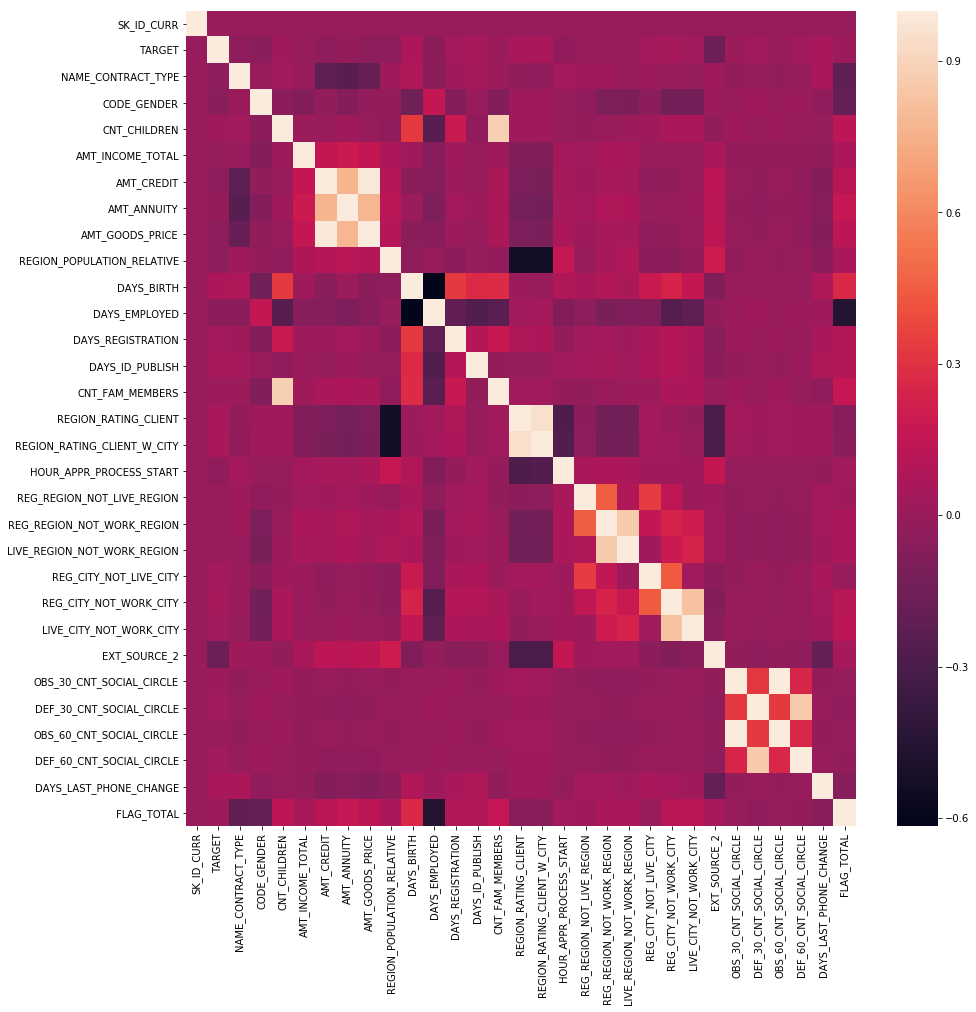

In [58]:
plt.figure(figsize=(15,15))
sns.heatmap(eda.corr())

## Encoding Categorical Features

In [59]:
to_dum = eda.drop(['DAYS_ID_PUBLISH', 'NAME_TYPE_SUITE', 'DAYS_LAST_PHONE_CHANGE',
                   'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START',
                   'ORGANIZATION_TYPE', 'SK_ID_CURR'], axis=1)

In [60]:
dum = pd.get_dummies(to_dum) # df with encoded categorical features

In [61]:
dum.drop(['REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'CNT_FAM_MEMBERS',
          'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START'], axis=1, inplace=True)

In [62]:
dum.drop(['AMT_ANNUITY',], axis=1, inplace=True)

In [63]:
names = dum.columns

In [64]:
social = [col for col in names if 'CIRCLE' in col.split('_')]

In [65]:
dum.drop(social[1:], axis=1, inplace=True)

In [66]:
names = dum.columns
regions = [col for col in names if 'REGION' in col.split('_')]

In [67]:
dum.drop(regions[1:], axis=1, inplace=True)

In [68]:
names = dum.columns
cities = [col for col in names if 'CITY' in col.split('_')]

In [69]:
dum.drop(cities[1:], axis=1, inplace=True)

In [70]:
names = dum.columns
income = [col for col in names if 'INCOME' in col.split('_')]

In [71]:
dum.drop(income[2:], axis=1, inplace=True)

In [72]:
names = dum.columns
housing = [col for col in names if 'HOUSING' in col.split('_')]

In [73]:
dum.drop(housing[1:], axis=1, inplace=True)

In [74]:
names = dum.columns
education = [col for col in names if 'EDUCATION' in col.split('_')]

In [75]:
dum.drop(education[1:], axis=1, inplace=True)

In [76]:
names = dum.columns
family = [col for col in names if 'FAMILY' in col.split('_')]

In [77]:
dum.drop(family[1:], axis=1, inplace=True)

## Train Test Splits

In [78]:
X = dum.drop(['TARGET'], axis=1) 
col_names = X.columns

In [79]:
y = dum.TARGET

In [80]:
smo = SMOTE(ratio='minority', k_neighbors=5)

In [81]:
X_up, y_up = smo.fit_sample(X, y)

In [82]:
X_up = pd.DataFrame(X_up)

In [83]:
X_up.columns = col_names

In [84]:
# upsampled
X_train_up, X_test_up, y_train_up, y_test_up = train_test_split(X_up, y_up, test_size=.2)

In [85]:
# control
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y, test_size=.2)

In [86]:
# sample 10% of approved loans; because of unbalanced data
approved_df = dum[dum['TARGET']==0].sample(frac=.1) 

In [87]:
# only loans not approved
not_approved_df = dum[dum['TARGET']==1] 

In [88]:
# combine approved sample with denied
equal = pd.concat([approved_df, not_approved_df])

In [89]:
outcome = equal['TARGET']

In [90]:
# downsampled
X_train_down, X_test_down, y_train_down, y_test_down = train_test_split(equal.drop('TARGET', axis=1), outcome , test_size=.2)

#### Creating classification metrics helper functions

In [91]:
cm_name_lst = []
recall_lst = []
specificity_lst = []
fal_pos_rate_lst = []
precision_lst = []

In [92]:
def confusion_matrix_metrics(conf):
    true_pos = conf[1, 1]
    true_neg = conf[0, 0]
    false_pos = conf[0, 1] # typeI
    false_neg = conf[1, 0] # typeII
    
    recall = true_pos / (true_pos + false_neg)
    specifity = true_neg / (true_neg + false_pos)
    false_positive_rate = false_pos / (true_neg + false_pos)
    precision = true_pos / (true_neg + false_pos)
    
    cm_name_lst.append(conf)
    
    print('Recall: ', recall)
    recall_lst.append(recall)
    
    print('Specificity: ', specifity)
    specificity_lst.append(specifity)
    
    print('False Positive Rate: ', false_positive_rate)
    fal_pos_rate_lst.append(false_positive_rate)
    
    print('Precision: ', precision)
    precision_lst.append(precision)

In [93]:
def print_confusion_matrix(confusion_matrix, class_names=('positive', 'negative'),
                           figsize=(10, 7), fontsize=14):
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), 
                                 rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(),
                                 rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    #return fig

In [94]:
def classification_metrics(y_true, y_pred):
    auc = roc_auc_score(y_true, y_pred)
    print(f'The area under the curve is {auc}')
    print()
    print(classification_report(y_true, y_pred))

### Logistic Regression with upsampled Data

In [95]:
log_up = LogisticRegression(max_iter=1000, solver='lbfgs')

In [96]:
log_up.fit(X_train_up, y_train_up)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [97]:
y_pred = log_up.predict(X_test_up)

In [98]:
log_up.score(X_test_up, y_test_up)

0.5626953003974612

In [99]:
cross_val_score(log_up, X_test_up, y_test_up, n_jobs=10, cv=10)

array([0.56036467, 0.5653213 , 0.56213489, 0.56368948, 0.5657755 ,
       0.55285057, 0.5569228 , 0.56825425, 0.57046742, 0.56427054])

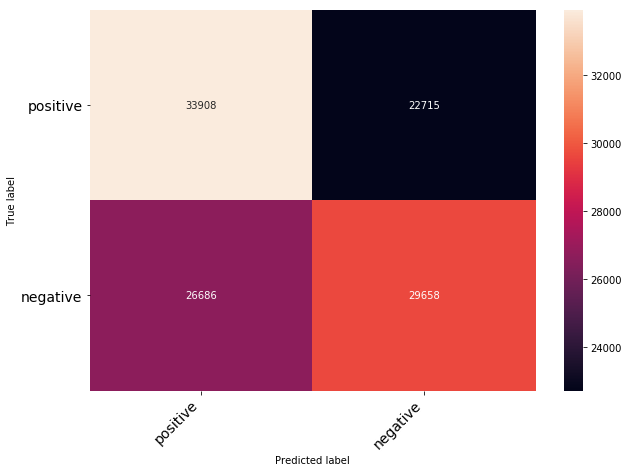

In [100]:
lr_up_ = confusion_matrix(y_test_up, y_pred)
print_confusion_matrix(lr_up_)

In [101]:
confusion_matrix_metrics(lr_up_)

Recall:  0.526373704387335
Specificity:  0.5988379280504389
False Positive Rate:  0.4011620719495611
Precision:  0.5237800893629797


In [102]:
classification_metrics(y_test_up, y_pred)

The area under the curve is 0.562605816218887

              precision    recall  f1-score   support

           0       0.56      0.60      0.58     56623
           1       0.57      0.53      0.55     56344

   micro avg       0.56      0.56      0.56    112967
   macro avg       0.56      0.56      0.56    112967
weighted avg       0.56      0.56      0.56    112967



### Logistic Regression with undersampled Data

In [103]:
log_under = LogisticRegression(max_iter=1000, solver='lbfgs')

In [104]:
log_under.fit(X_train_down, y_train_down)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [105]:
y_pred = log_under.predict(X_test_down)

In [106]:
log_under.score(X_test_down, y_test_down)

0.568426013195099

In [107]:
cross_val_score(log_under, X_test_down, y_test_down, n_jobs=10, cv=10)

array([0.58812441, 0.5730443 , 0.56833176, 0.56456173, 0.56079171,
       0.57964185, 0.55796418, 0.54759661, 0.56079171, 0.57869934])

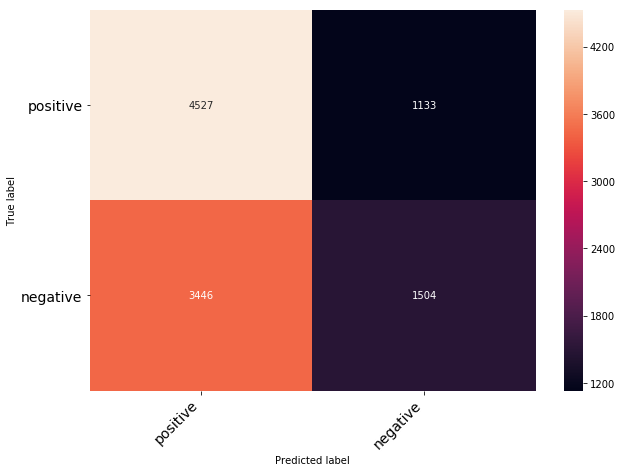

In [108]:
lr_under_ = confusion_matrix(y_test_down, y_pred)
print_confusion_matrix(lr_under_)

In [109]:
confusion_matrix_metrics(lr_under_)

Recall:  0.30383838383838385
Specificity:  0.7998233215547703
False Positive Rate:  0.20017667844522968
Precision:  0.2657243816254417


In [110]:
classification_metrics(y_test_down, y_pred)

The area under the curve is 0.5518308526965771

              precision    recall  f1-score   support

           0       0.57      0.80      0.66      5660
           1       0.57      0.30      0.40      4950

   micro avg       0.57      0.57      0.57     10610
   macro avg       0.57      0.55      0.53     10610
weighted avg       0.57      0.57      0.54     10610



### Logistic Regression with unweighted data

In [111]:
log_control = LogisticRegression(max_iter=1000, solver='lbfgs')

In [112]:
log_control.fit(X_train_c, y_train_c)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [113]:
y_pred = log_control.predict(X_test_c)

In [114]:
log_control.score(X_test_c, y_test_c)

0.9201223878653734

In [115]:
cross_val_score(log_control, X_test_c, y_test_c, n_jobs=10, cv=10)

array([0.92009764, 0.92009764, 0.92009764, 0.92009764, 0.92009764,
       0.92009764, 0.92008464, 0.92008464, 0.92023441, 0.92023441])

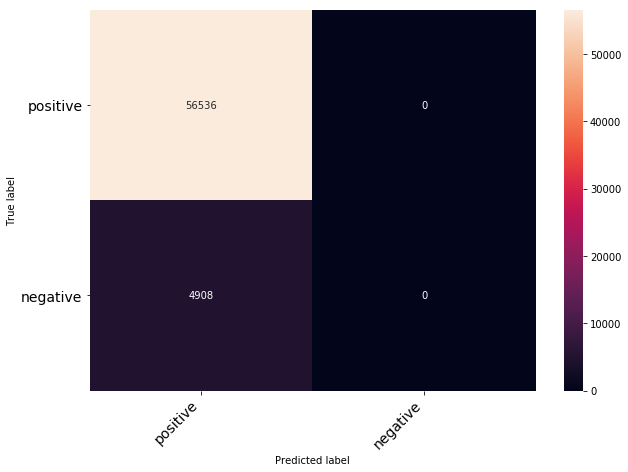

In [116]:
lr_control = confusion_matrix(y_test_c, y_pred)
print_confusion_matrix(lr_control)

In [117]:
confusion_matrix_metrics(lr_control)

Recall:  0.0
Specificity:  1.0
False Positive Rate:  0.0
Precision:  0.0


In [118]:
classification_metrics(y_test_c, y_pred)

The area under the curve is 0.5

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56536
           1       0.00      0.00      0.00      4908

   micro avg       0.92      0.92      0.92     61444
   macro avg       0.46      0.50      0.48     61444
weighted avg       0.85      0.92      0.88     61444



/home/keithlaskay/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/keithlaskay/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/keithlaskay/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


* Note the warning caused by the imbalanced prediction of the control

### KNN Classifer  with upsampled data

In [119]:
ks = list(range(2,21))

In [120]:
for num in ks:
    neighbor = KNeighborsClassifier(n_neighbors=num, n_jobs=10)
    neighbor.fit(X_train_up, y_train_up)
    print('For {} neighbors and classification accuracy is {}'.format(
        num, neighbor.score(X_test_up, y_test_up)))
    print('Cross val mean is {} with a standard deviation of {} \n'.format(
    cross_val_score(neighbor, X_test_up, y_test_up, cv=10, n_jobs=10).mean(),
        cross_val_score(neighbor, X_test_up, y_test_up, cv=10, n_jobs=10).std() ))

For 2 neighbors and classification accuracy is 0.8156629812246055
Cross val mean is 0.7020634741760213 with a standard deviation of 0.004065484145523523 

For 3 neighbors and classification accuracy is 0.8170704719077253
Cross val mean is 0.7075430032504135 with a standard deviation of 0.0036474930412081375 

For 4 neighbors and classification accuracy is 0.8094576292191525
Cross val mean is 0.69333532555269 with a standard deviation of 0.004117597308815461 

For 5 neighbors and classification accuracy is 0.8006585994139882
Cross val mean is 0.6881657182384362 with a standard deviation of 0.003956448833064191 

For 6 neighbors and classification accuracy is 0.7962325280834226
Cross val mean is 0.6829252455190884 with a standard deviation of 0.0033811814100497095 

For 7 neighbors and classification accuracy is 0.7854948790354706
Cross val mean is 0.6747457482686989 with a standard deviation of 0.0020390845565792276 

For 8 neighbors and classification accuracy is 0.7840077190684005
Cro

### KNN Classifer with undersampled data

In [121]:
for num in ks:
    neighbor = KNeighborsClassifier(n_neighbors=num, n_jobs=10)
    neighbor.fit(X_train_down,y_train_down)
    print('For {} neighbors and classification accuracy is {}'.format(
        num, neighbor.score(X_test_down,y_test_down)))
    print('Cross val mean is {} with a standard deviation of {} \n'.format(
    cross_val_score(neighbor, X_test_down, y_test_down, cv=10, n_jobs=6).mean(), 
        cross_val_score(neighbor, X_test_down, y_test_down, cv=10, n_jobs=10).std() ))

For 2 neighbors and classification accuracy is 0.5473138548539114
Cross val mean is 0.5461828463713477 with a standard deviation of 0.018213811934573637 

For 3 neighbors and classification accuracy is 0.5460885956644674
Cross val mean is 0.5464655984919886 with a standard deviation of 0.018391208804192108 

For 4 neighbors and classification accuracy is 0.5567389255419416
Cross val mean is 0.5481621112158341 with a standard deviation of 0.01226853164582315 

For 5 neighbors and classification accuracy is 0.5548539114043355
Cross val mean is 0.5496701225259188 with a standard deviation of 0.013895508006772552 

For 6 neighbors and classification accuracy is 0.5653157398680491
Cross val mean is 0.5567389255419416 with a standard deviation of 0.013986309504451124 

For 7 neighbors and classification accuracy is 0.5602262016965127
Cross val mean is 0.5527803958529689 with a standard deviation of 0.012716861978573265 

For 8 neighbors and classification accuracy is 0.5698397737983035
Cross

### KNN Classifer with unweighted data

In [122]:
for num in ks:
    neighbor = KNeighborsClassifier(n_neighbors=num, n_jobs=10)
    neighbor.fit(X_train_c,y_train_c)
    print('For {} neighbors and classification accuracy is {}'.format(
        num, neighbor.score(X_test_c,y_test_c)))
    print('Cross val mean is {} with a standard deviation of {} \n'.format(
        cross_val_score(neighbor, X_test_c, y_test_c, cv=10, n_jobs=6).mean(), 
        cross_val_score(neighbor, X_test_c, y_test_c, cv=10, n_jobs=10).std() ))

For 2 neighbors and classification accuracy is 0.9142959442744613
Cross val mean is 0.9138238544245325 with a standard deviation of 0.0014112810983814919 

For 3 neighbors and classification accuracy is 0.9028383568778074
Cross val mean is 0.9022685162763497 with a standard deviation of 0.002502613077768877 

For 4 neighbors and classification accuracy is 0.9173230909446
Cross val mean is 0.9175997478177427 with a standard deviation of 0.0006927632533481414 

For 5 neighbors and classification accuracy is 0.9141169194713886
Cross val mean is 0.9145888336957165 with a standard deviation of 0.000975776928228374 

For 6 neighbors and classification accuracy is 0.918983139118547
Cross val mean is 0.9192110123998092 with a standard deviation of 0.0002953360205430068 

For 7 neighbors and classification accuracy is 0.917762515461233
Cross val mean is 0.9177462295501149 with a standard deviation of 0.0008474220747081978 

For 8 neighbors and classification accuracy is 0.91948766356357
Cross v

### Decision Tree Classifier witn upsampled data 

In [123]:
tree_up = DecisionTreeClassifier(max_depth=10)

In [124]:
tree_up.fit(X_train_up, y_train_up)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [125]:
y_pred = tree_up.predict(X_test_up)

In [126]:
tree_up.score(X_test_up, y_test_up)

0.9017854771747501

In [127]:
cross_val_score(tree_up, X_test_up, y_test_up, cv=10, n_jobs=10)

array([0.89228182, 0.89564525, 0.89900867, 0.89439674, 0.89660057,
       0.89677762, 0.8957153 , 0.89544972, 0.89783994, 0.89562677])

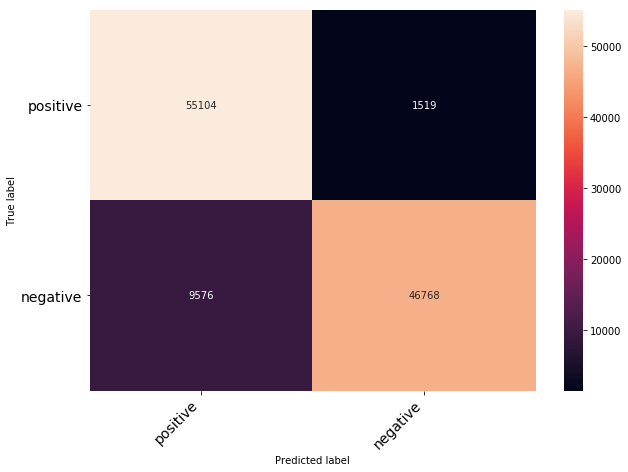

In [128]:
dt_up = confusion_matrix(y_test_up, y_pred)
print_confusion_matrix(dt_up)

In [129]:
confusion_matrix_metrics(dt_up)

Recall:  0.8300440153343746
Specificity:  0.9731734454197057
False Positive Rate:  0.02682655458029423
Precision:  0.825954117584727


In [130]:
print(classification_metrics(y_test_up, y_pred))

The area under the curve is 0.9016087303770401

              precision    recall  f1-score   support

           0       0.85      0.97      0.91     56623
           1       0.97      0.83      0.89     56344

   micro avg       0.90      0.90      0.90    112967
   macro avg       0.91      0.90      0.90    112967
weighted avg       0.91      0.90      0.90    112967

None


### Decision Tree Classifier witn undersampled data

In [131]:
tree_under = DecisionTreeClassifier(max_depth=10)

In [132]:
tree_under.fit(X_train_down, y_train_down)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [133]:
y_pred = tree_under.predict(X_test_down)

In [134]:
tree_under.score(X_test_down, y_test_down)

0.6271442035815269

In [135]:
cross_val_score(tree_under, X_test_down, y_test_down, cv=10, n_jobs=10)

array([0.63430726, 0.60791706, 0.5871819 , 0.62205467, 0.62582469,
       0.62299717, 0.60414703, 0.62016965, 0.57775683, 0.61168709])

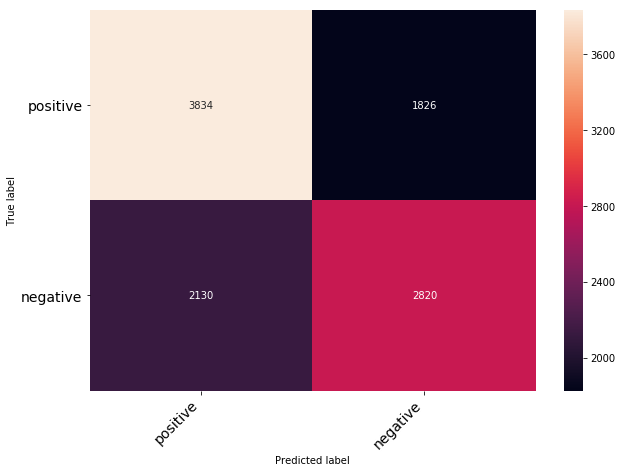

In [136]:
dt_under = confusion_matrix(y_test_down, y_pred)
print_confusion_matrix(dt_under)

In [137]:
confusion_matrix_metrics(dt_under)

Recall:  0.5696969696969697
Specificity:  0.6773851590106007
False Positive Rate:  0.3226148409893993
Precision:  0.49823321554770317


In [138]:
classification_metrics(y_test_down, y_pred)

The area under the curve is 0.6235410643537852

              precision    recall  f1-score   support

           0       0.64      0.68      0.66      5660
           1       0.61      0.57      0.59      4950

   micro avg       0.63      0.63      0.63     10610
   macro avg       0.62      0.62      0.62     10610
weighted avg       0.63      0.63      0.63     10610



### Decision Tree Classifier witn unweighted data

In [139]:
tree_control = DecisionTreeClassifier(max_depth=10)

In [140]:
tree_control.fit(X_train_c, y_train_c)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [141]:
y_pred = tree_control.predict(X_test_c)

In [142]:
tree_control.score(X_test_c, y_test_c)

0.918234489942061

In [143]:
cross_val_score(tree_control, X_test_c, y_test_c, cv=10, n_jobs=10)

array([0.91554109, 0.91554109, 0.91554109, 0.91554109, 0.91375102,
       0.91554109, 0.91552734, 0.91552734, 0.91486245, 0.91356015])

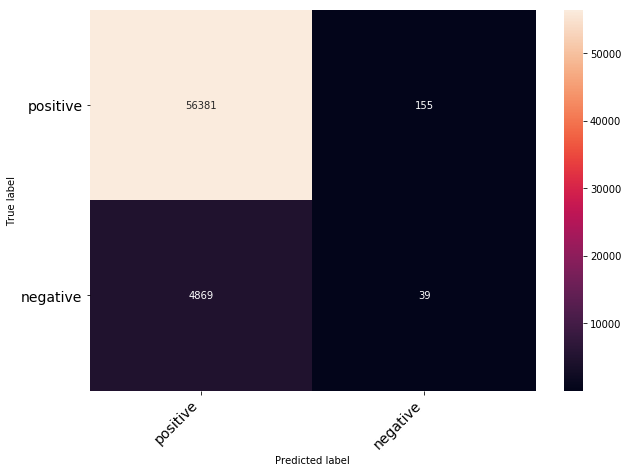

In [144]:
dt_control = confusion_matrix(y_test_c, y_pred)
print_confusion_matrix(dt_control)

In [145]:
confusion_matrix_metrics(dt_control)

Recall:  0.007946210268948655
Specificity:  0.9972583840384888
False Positive Rate:  0.0027416159615112493
Precision:  0.0006898259516060564


In [146]:
classification_metrics(y_test_c, y_pred)

The area under the curve is 0.5026022971537187

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56536
           1       0.20      0.01      0.02      4908

   micro avg       0.92      0.92      0.92     61444
   macro avg       0.56      0.50      0.49     61444
weighted avg       0.86      0.92      0.88     61444



### Gradient Boosting Classifier with upsampled data

In [147]:
gb_up = GradientBoostingClassifier()

In [148]:
gb_up.fit(X_train_up, y_train_up)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [149]:
y_pred = gb_up.predict(X_test_up)

In [150]:
gb_up.score(X_test_up, y_test_up)

0.9405578620305045

In [151]:
cross_val_score(gb_up, X_test_up, y_test_up, cv=10, n_jobs=10)

array([0.94627368, 0.93830767, 0.94158258, 0.93927591, 0.94157224,
       0.9384738 , 0.94015581, 0.93820822, 0.9388279 , 0.9398017 ])

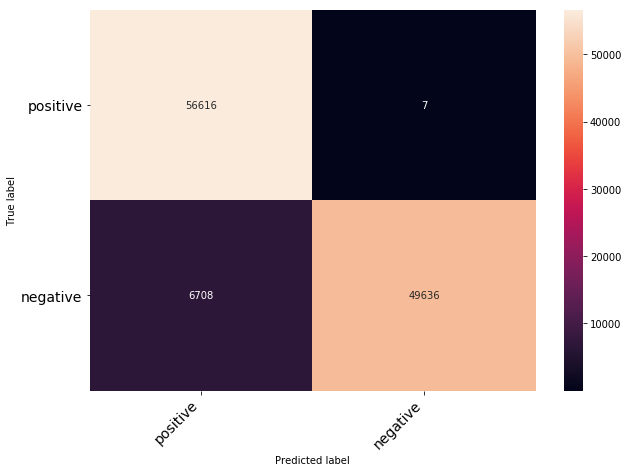

In [152]:
gb_cm_up = confusion_matrix(y_test_up, y_pred)
print_confusion_matrix(gb_cm_up)

In [153]:
confusion_matrix_metrics(gb_cm_up)

Recall:  0.880945619764305
Specificity:  0.9998763753245148
False Positive Rate:  0.00012362467548522686
Precision:  0.8766049131978172


In [154]:
classification_metrics(y_test_up, y_pred)

The area under the curve is 0.9404109975444098

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     56623
           1       1.00      0.88      0.94     56344

   micro avg       0.94      0.94      0.94    112967
   macro avg       0.95      0.94      0.94    112967
weighted avg       0.95      0.94      0.94    112967



#### Modifing Gradient Boosting Classifier - more depth and estimators
* estimators = 500
* depth = 5

In [155]:
gb_up_5 = GradientBoostingClassifier(n_estimators=500, max_depth=5)

In [156]:
gb_up_5.fit(X_train_up, y_train_up)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=500,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [157]:
y_pred = gb_up_5.predict(X_test_up)

In [158]:
gb_up_5.score(X_test_up, y_test_up)

0.9507024175201607

In [159]:
cross_val_score(gb_up_5, X_test_up, y_test_up, cv=10, n_jobs=10)

array([0.95406267, 0.94795539, 0.95078775, 0.94874746, 0.95192989,
       0.94812323, 0.95007082, 0.94856586, 0.94847734, 0.94847734])

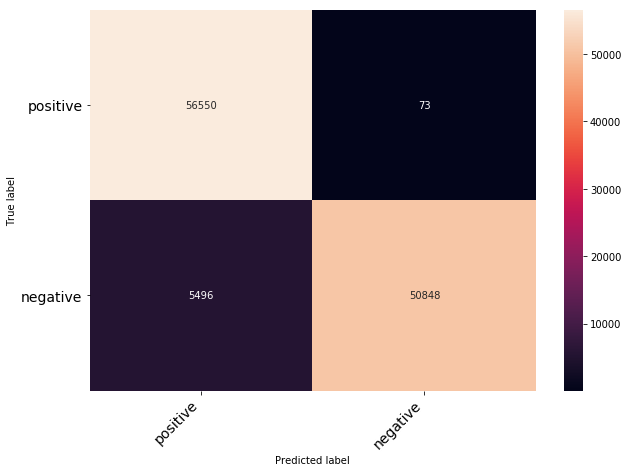

In [160]:
gb_cm_up5 = confusion_matrix(y_test_up, y_pred)
print_confusion_matrix(gb_cm_up5)

In [161]:
confusion_matrix_metrics(gb_cm_up5)

Recall:  0.9024563396279994
Specificity:  0.9987107712413683
False Positive Rate:  0.0012892287586316515
Precision:  0.8980096427246879


In [162]:
classification_metrics(y_test_up, y_pred)

The area under the curve is 0.9505835554346838

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     56623
           1       1.00      0.90      0.95     56344

   micro avg       0.95      0.95      0.95    112967
   macro avg       0.95      0.95      0.95    112967
weighted avg       0.95      0.95      0.95    112967



### Gradient Boosting Classifier with undersampled data

In [163]:
gb_under = GradientBoostingClassifier()

In [164]:
gb_under.fit(X_train_down, y_train_down)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [165]:
y_pred = gb_under.predict(X_test_down)

In [166]:
gb_under.score(X_test_down, y_test_down)

0.6597549481621112

In [167]:
cross_val_score(gb_under, X_test_down, y_test_down, cv=10, n_jobs=10)

array([0.66540999, 0.65692743, 0.62770971, 0.66069746, 0.64844486,
       0.67200754, 0.66069746, 0.66823751, 0.63147974, 0.65692743])

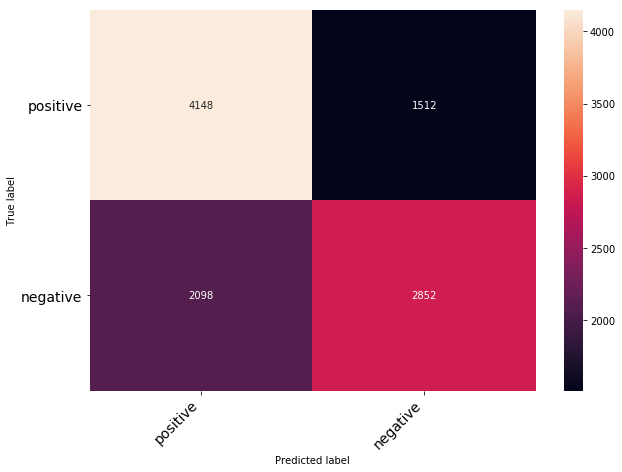

In [168]:
gb_cm_under = confusion_matrix(y_test_down, y_pred)
print_confusion_matrix(gb_cm_under)

In [169]:
confusion_matrix_metrics(gb_cm_under)

Recall:  0.5761616161616162
Specificity:  0.7328621908127209
False Positive Rate:  0.26713780918727914
Precision:  0.503886925795053


In [170]:
classification_metrics(y_test_down, y_pred)

The area under the curve is 0.6545119034871686

              precision    recall  f1-score   support

           0       0.66      0.73      0.70      5660
           1       0.65      0.58      0.61      4950

   micro avg       0.66      0.66      0.66     10610
   macro avg       0.66      0.65      0.65     10610
weighted avg       0.66      0.66      0.66     10610



Modifing Gradient Boosting Classifier
* estimators = 500
* depth = 5

In [171]:
gb_under_5 = GradientBoostingClassifier(n_estimators=500, max_depth=5)

In [172]:
gb_under_5.fit(X_train_down, y_train_down)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=500,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [173]:
y_pred = gb_under_5.predict(X_test_down)

In [174]:
gb_under_5.score(X_test_down, y_test_down)

0.6508953817153629

In [175]:
cross_val_score(gb_under_5, X_test_down, y_test_down, cv=10, n_jobs=10)

array([0.62393968, 0.61262959, 0.6267672 , 0.64938737, 0.62488219,
       0.62205467, 0.62865221, 0.63053723, 0.6135721 , 0.63242224])

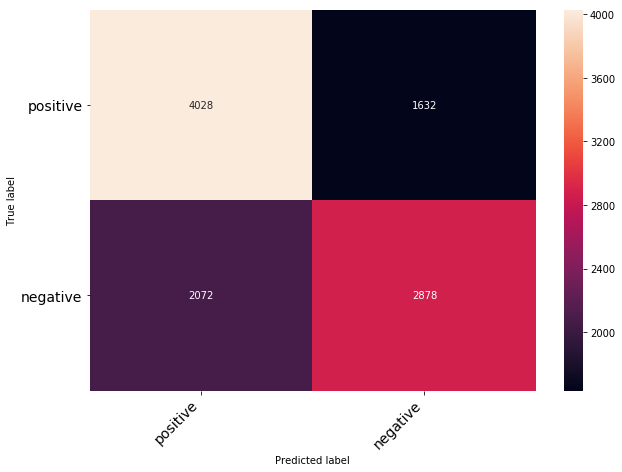

In [176]:
gb_cm_under5 = confusion_matrix(y_test_down, y_pred)
print_confusion_matrix(gb_cm_under5)

In [177]:
confusion_matrix_metrics(gb_cm_under5)

Recall:  0.5814141414141414
Specificity:  0.711660777385159
False Positive Rate:  0.28833922261484096
Precision:  0.5084805653710247


In [179]:
classification_metrics(y_test_down, y_pred)

The area under the curve is 0.6465374593996502

              precision    recall  f1-score   support

           0       0.66      0.71      0.69      5660
           1       0.64      0.58      0.61      4950

   micro avg       0.65      0.65      0.65     10610
   macro avg       0.65      0.65      0.65     10610
weighted avg       0.65      0.65      0.65     10610



### Gradient Boosting Classifier with unweighted data

In [180]:
gb_control = GradientBoostingClassifier()

In [181]:
gb_control.fit(X_train_c, y_train_c)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [182]:
y_pred = gb_control.predict(X_test_c)

In [183]:
gb_control.score(X_test_c, y_test_c)

0.9202525877221535

In [184]:
cross_val_score(gb_control, X_test_c, y_test_c, cv=10, n_jobs=10)

array([0.92026037, 0.92026037, 0.92009764, 0.91960944, 0.91977217,
       0.92026037, 0.92008464, 0.91943359, 0.92007163, 0.91974605])

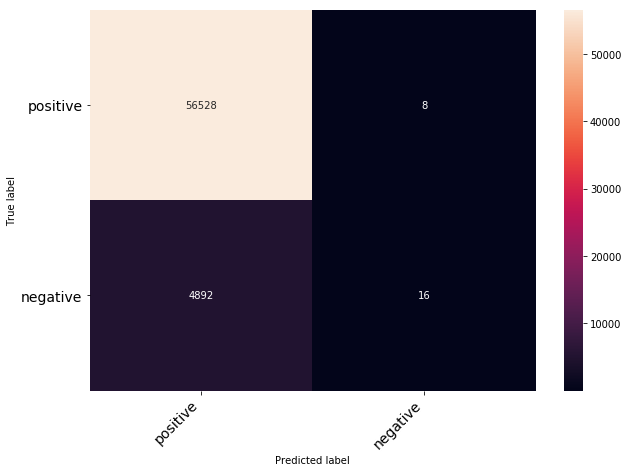

In [185]:
gb_cm_control = confusion_matrix(y_test_c, y_pred)
print_confusion_matrix(gb_cm_control)

In [186]:
confusion_matrix_metrics(gb_cm_control)

Recall:  0.0032599837000814994
Specificity:  0.9998584972406962
False Positive Rate:  0.00014150275930380644
Precision:  0.0002830055186076129


In [188]:
classification_metrics(y_test_c, y_pred)

The area under the curve is 0.5015592404703889

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56536
           1       0.67      0.00      0.01      4908

   micro avg       0.92      0.92      0.92     61444
   macro avg       0.79      0.50      0.48     61444
weighted avg       0.90      0.92      0.88     61444



Modifing Gradient Boosting Classifier
* estimators = 500
* depth = 5

In [189]:
gb_control_5 = GradientBoostingClassifier()

In [190]:
gb_control_5.fit(X_train_c, y_train_c)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [191]:
y_pred = gb_control_5.predict(X_test_c)

In [192]:
gb_control_5.score(X_test_c, y_test_c)

0.9202525877221535

In [193]:
cross_val_score(gb_control_5, X_test_c, y_test_c, cv=10, n_jobs=10)

array([0.92026037, 0.92026037, 0.92009764, 0.91960944, 0.91977217,
       0.92026037, 0.92008464, 0.91943359, 0.92007163, 0.91974605])

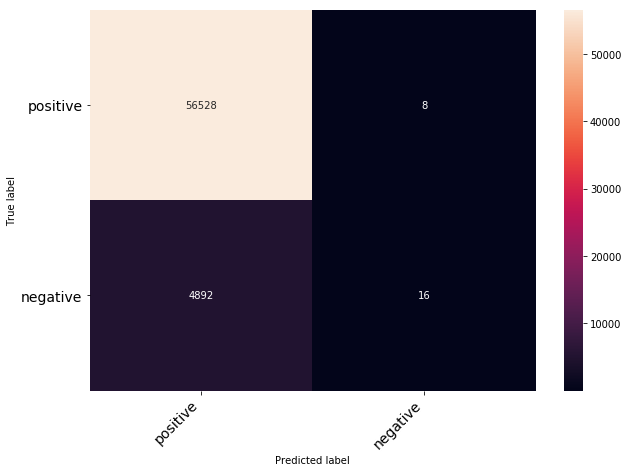

In [194]:
gb_cm_control5 = confusion_matrix(y_test_c, y_pred)
print_confusion_matrix(gb_cm_control5)

In [195]:
confusion_matrix_metrics(gb_cm_control5)

Recall:  0.0032599837000814994
Specificity:  0.9998584972406962
False Positive Rate:  0.00014150275930380644
Precision:  0.0002830055186076129


In [197]:
classification_metrics(y_test_c, y_pred)

The area under the curve is 0.5015592404703889

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56536
           1       0.67      0.00      0.01      4908

   micro avg       0.92      0.92      0.92     61444
   macro avg       0.79      0.50      0.48     61444
weighted avg       0.90      0.92      0.88     61444



### Random Forest Classifier with upsampled data 

In [198]:
rf_up = RandomForestClassifier(n_estimators=100, max_depth=2, n_jobs=10)

In [199]:
rf_up.fit(X_train_up, y_train_up)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=10,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [200]:
y_pred = rf_up.predict(X_test_up)

In [201]:
rf_up.score(X_test_up, y_test_up)

0.7798914727309745

In [202]:
cross_val_score(rf_up, X_test_up, y_test_up, cv=10, n_jobs=10)

array([0.77208355, 0.75048681, 0.75438131, 0.77834823, 0.76398725,
       0.75964943, 0.76009207, 0.7628364 , 0.75247875, 0.78160411])

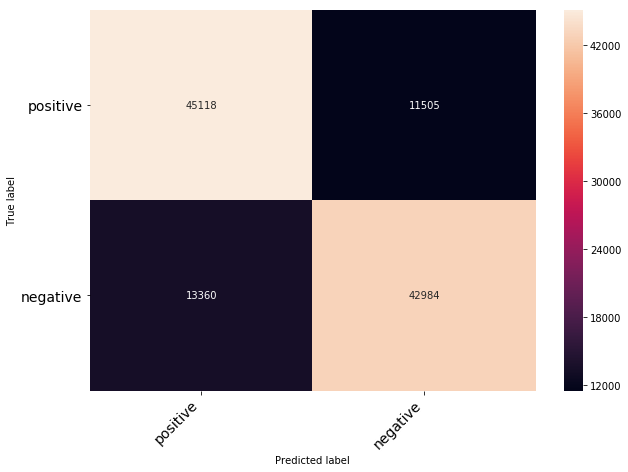

In [203]:
rf_cm_up = confusion_matrix(y_test_up, y_pred)
print_confusion_matrix(rf_cm_up)

In [204]:
confusion_matrix_metrics(rf_cm_up)

Recall:  0.7628851341757774
Specificity:  0.7968140155060665
False Positive Rate:  0.20318598449393355
Precision:  0.7591261501509987


In [205]:
classification_metrics(y_test_up, y_pred)

The area under the curve is 0.779849574840922

              precision    recall  f1-score   support

           0       0.77      0.80      0.78     56623
           1       0.79      0.76      0.78     56344

   micro avg       0.78      0.78      0.78    112967
   macro avg       0.78      0.78      0.78    112967
weighted avg       0.78      0.78      0.78    112967



#### Modifing Random Forrest Classifier
* estimators = 1000
* depth = 5
* class weight: approved = 1, denied = 1.5

In [206]:
rf_up_5 = RandomForestClassifier(n_estimators=1000, max_depth=5, n_jobs=10,
                            class_weight={0:1, 1:1.5})

In [207]:
rf_up_5.fit(X_train_up, y_train_up)

RandomForestClassifier(bootstrap=True, class_weight={0: 1, 1: 1.5},
            criterion='gini', max_depth=5, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=10, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [208]:
y_pred = rf_up_5.predict(X_test_up)

In [209]:
rf_up_5.score(X_test_up, y_test_up)

0.8117503341683855

In [210]:
cross_val_score(rf_up_5, X_test_up, y_test_up, cv=10, n_jobs=10)

array([0.80377058, 0.8086387 , 0.80739954, 0.80614322, 0.80931303,
       0.80169972, 0.80417847, 0.80745397, 0.80470963, 0.81701487])

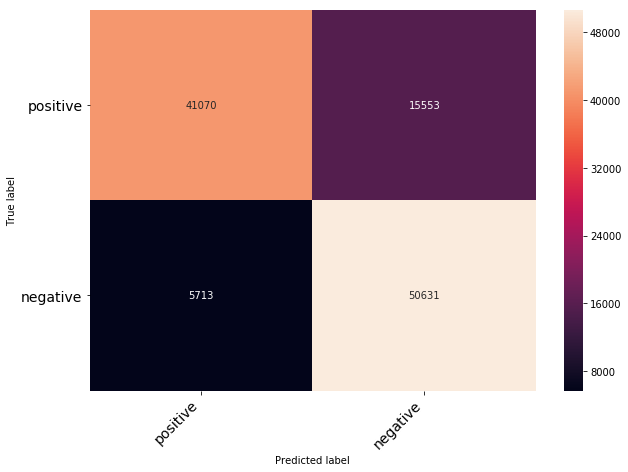

In [211]:
rf_cm_up5 = confusion_matrix(y_test_up, y_pred)
print_confusion_matrix(rf_cm_up5)

In [212]:
confusion_matrix_metrics(rf_cm_up5)

Recall:  0.8986049978702257
Specificity:  0.7253236317397525
False Positive Rate:  0.2746763682602476
Precision:  0.8941772777846458


In [213]:
classification_metrics(y_test_up, y_pred)

The area under the curve is 0.8119643148049891

              precision    recall  f1-score   support

           0       0.88      0.73      0.79     56623
           1       0.77      0.90      0.83     56344

   micro avg       0.81      0.81      0.81    112967
   macro avg       0.82      0.81      0.81    112967
weighted avg       0.82      0.81      0.81    112967



#### Evaluating Random Forest with different depths

In [214]:
depth = list(range(2,11))
scores_up = []
type2_errors_up = []
for number in depth:
    rf = RandomForestClassifier(n_estimators=100, max_depth=number, n_jobs=10)
    rf.fit(X_train_up, y_train_up)
    y_pred = rf.predict(X_test_up)
    scores_up.append(rf.score(X_test_up, y_test_up))
    type2_errors_up.append(confusion_matrix(y_test_up, y_pred)[1][0])
    print('Depth: {};     Score: {};     total typeII error on test {} \n'.format(number,
                                                                                 rf.score(X_test_up, y_test_up),
                                                                                 confusion_matrix(y_test_up, y_pred)[1][0]))

Depth: 2;     Score: 0.7553090725610134;     total typeII error on test 13338 

Depth: 3;     Score: 0.793488363858472;     total typeII error on test 12105 

Depth: 4;     Score: 0.8178671647472271;     total typeII error on test 11695 

Depth: 5;     Score: 0.8592066709747094;     total typeII error on test 10699 

Depth: 6;     Score: 0.8800180583710288;     total typeII error on test 10547 

Depth: 7;     Score: 0.8965538608620216;     total typeII error on test 10163 

Depth: 8;     Score: 0.9025025007303018;     total typeII error on test 10003 

Depth: 9;     Score: 0.9161613568564271;     total typeII error on test 9312 

Depth: 10;     Score: 0.9186930696575106;     total typeII error on test 9146 



#### Evaluating Random Forest with different amounts of estimators

In [215]:
estimators = list(range(100, 1001,100))
scores2_up = []
type2_errors2_up = []
for number in estimators:
    rf = RandomForestClassifier(n_estimators=number, max_depth=5, n_jobs=10)
    rf.fit(X_train_up, y_train_up)
    y_pred = rf.predict(X_test_up)
    scores2_up.append(rf.score(X_test_up, y_test_up))
    type2_errors2_up.append(confusion_matrix(y_test_up, y_pred)[1][0])
    print('Estimators: {};     Score: {};     total typeII error on test {} \n'.format(number,
                                                                                 rf.score(X_test_up, y_test_up),
                                                                                 confusion_matrix(y_test_up, y_pred)[1][0]))

Estimators: 100;     Score: 0.8639956801543813;     total typeII error on test 10602 

Estimators: 200;     Score: 0.8574362424424832;     total typeII error on test 10740 

Estimators: 300;     Score: 0.8639160108704312;     total typeII error on test 10411 

Estimators: 400;     Score: 0.8619685394849823;     total typeII error on test 10592 

Estimators: 500;     Score: 0.8625881894712615;     total typeII error on test 10656 

Estimators: 600;     Score: 0.8585073517044801;     total typeII error on test 10678 

Estimators: 700;     Score: 0.8618180530597431;     total typeII error on test 10564 

Estimators: 800;     Score: 0.8609593952216134;     total typeII error on test 10686 

Estimators: 900;     Score: 0.8624288509033612;     total typeII error on test 10599 

Estimators: 1000;     Score: 0.8613223330707198;     total typeII error on test 10548 



### Random Forest Classifier with undersampled data

In [216]:
rf_under = RandomForestClassifier(n_estimators=500, max_depth=5, n_jobs=10)

In [217]:
rf_under.fit(X_train_down, y_train_down)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=10,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [218]:
y_pred = rf_under.predict(X_test_down)

In [219]:
rf_under.score(X_test_down, y_test_down)

0.6449575871819039

In [220]:
cross_val_score(rf_under, X_test_down, y_test_down, cv=10, n_jobs=10)

array([0.65504241, 0.62299717, 0.62299717, 0.65504241, 0.65504241,
       0.66069746, 0.65127238, 0.667295  , 0.63053723, 0.65409991])

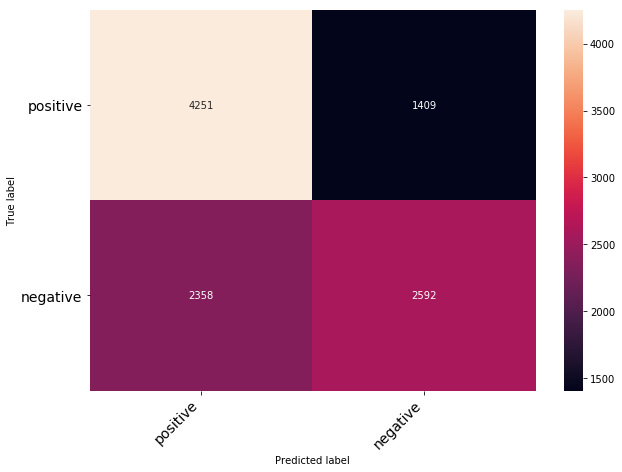

In [221]:
rf_cm_under = confusion_matrix(y_test_down, y_pred)
print_confusion_matrix(rf_cm_under)

In [222]:
confusion_matrix_metrics(rf_cm_under)

Recall:  0.5236363636363637
Specificity:  0.7510600706713781
False Positive Rate:  0.2489399293286219
Precision:  0.4579505300353357


In [223]:
classification_metrics(y_test_down, y_pred)

The area under the curve is 0.6373482171538709

              precision    recall  f1-score   support

           0       0.64      0.75      0.69      5660
           1       0.65      0.52      0.58      4950

   micro avg       0.64      0.64      0.64     10610
   macro avg       0.65      0.64      0.64     10610
weighted avg       0.65      0.64      0.64     10610



Modifing Random Forrest Classifier
* estimators = 1000
* depth = 5
* class weight: approved = 1, denied = 1.5

In [224]:
rf_under_5 = RandomForestClassifier(n_estimators=1000, max_depth=5, n_jobs=10,
                            class_weight={0:1, 1:1.5})

In [225]:
rf_under_5.fit(X_train_down, y_train_down)

RandomForestClassifier(bootstrap=True, class_weight={0: 1, 1: 1.5},
            criterion='gini', max_depth=5, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=10, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [226]:
y_pred = rf_under_5.predict(X_test_down)

In [227]:
rf_under_5.score(X_test_down, y_test_down)

0.6065975494816211

In [228]:
cross_val_score(rf_under_5, X_test_down, y_test_down, cv=10, n_jobs=10)

array([0.62299717, 0.62299717, 0.61168709, 0.63901979, 0.62111216,
       0.62865221, 0.60226202, 0.63053723, 0.59566447, 0.60226202])

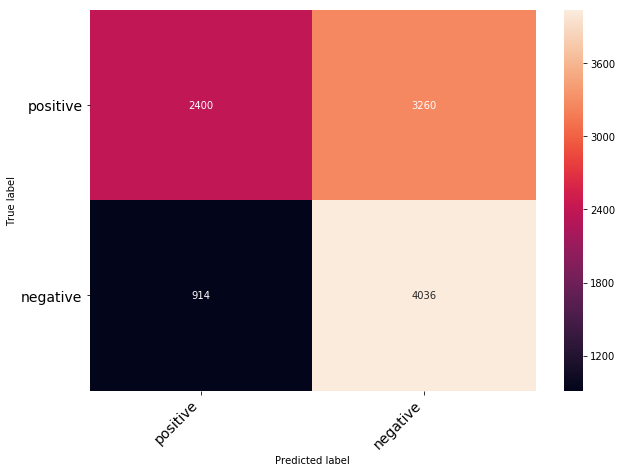

In [229]:
rf_cm_under5 = confusion_matrix(y_test_down, y_pred)
print_confusion_matrix(rf_cm_under5)

In [230]:
confusion_matrix_metrics(rf_cm_under5)

Recall:  0.8153535353535354
Specificity:  0.42402826855123676
False Positive Rate:  0.5759717314487632
Precision:  0.7130742049469965


In [231]:
classification_metrics(y_test_down, y_pred)

The area under the curve is 0.6196909019523861

              precision    recall  f1-score   support

           0       0.72      0.42      0.53      5660
           1       0.55      0.82      0.66      4950

   micro avg       0.61      0.61      0.61     10610
   macro avg       0.64      0.62      0.60     10610
weighted avg       0.64      0.61      0.59     10610



#### Evaluating Random Forest with different depths

In [232]:
depth = list(range(2,11))
scores = []
type2_errors = []
for number in depth:
    rf = RandomForestClassifier(n_estimators=100, max_depth=number, n_jobs=10)
    rf.fit(X_train_down, y_train_down)
    y_pred = rf.predict(X_test_down)
    scores.append(rf.score(X_test_down, y_test_down))
    type2_errors.append(confusion_matrix(y_test_down, y_pred)[1][0])
    print('Depth: {};     Score: {};     total typeII error on test {} \n'.format(number,
                                                                                 rf.score(X_test_down, y_test_down),
                                                                                 confusion_matrix(y_test_down, y_pred)[1][0]))

Depth: 2;     Score: 0.6366635249764373;     total typeII error on test 2618 

Depth: 3;     Score: 0.6372290292177192;     total typeII error on test 2462 

Depth: 4;     Score: 0.6407163053722903;     total typeII error on test 2465 

Depth: 5;     Score: 0.6458058435438265;     total typeII error on test 2321 

Depth: 6;     Score: 0.6453345900094251;     total typeII error on test 2323 

Depth: 7;     Score: 0.6483506126295947;     total typeII error on test 2255 

Depth: 8;     Score: 0.6508011310084826;     total typeII error on test 2243 

Depth: 9;     Score: 0.6548539114043356;     total typeII error on test 2165 

Depth: 10;     Score: 0.6529688972667295;     total typeII error on test 2159 



#### Evaluating Random Forest with different estimators

In [233]:
estimators = list(range(100, 1001,100))
scores2 = []
type2_errors2 = []
for number in estimators:
    rf = RandomForestClassifier(n_estimators=number, max_depth=5, n_jobs=10)
    rf.fit(X_train_down, y_train_down)
    y_pred = rf.predict(X_test_down)
    scores2.append(rf.score(X_test_down, y_test_down))
    type2_errors2.append(confusion_matrix(y_test_down, y_pred)[1][0])
    print('Estimators: {};     Score: {};     total typeII error on test {} \n'.format(number,
                                                                                 rf.score(X_test_down, y_test_down),
                                                                                 confusion_matrix(y_test_down, y_pred)[1][0]))

Estimators: 100;     Score: 0.6420358152686145;     total typeII error on test 2338 

Estimators: 200;     Score: 0.6459943449575872;     total typeII error on test 2310 

Estimators: 300;     Score: 0.6459943449575872;     total typeII error on test 2355 

Estimators: 400;     Score: 0.6462770970782281;     total typeII error on test 2340 

Estimators: 500;     Score: 0.644392082940622;     total typeII error on test 2369 

Estimators: 600;     Score: 0.6453345900094251;     total typeII error on test 2375 

Estimators: 700;     Score: 0.6459943449575872;     total typeII error on test 2349 

Estimators: 800;     Score: 0.6459000942507069;     total typeII error on test 2339 

Estimators: 900;     Score: 0.6448633364750236;     total typeII error on test 2346 

Estimators: 1000;     Score: 0.6457115928369462;     total typeII error on test 2337 



### Random Forest Classifier with unweighted data

In [234]:
rf_control = RandomForestClassifier(n_estimators=500, max_depth=5, n_jobs=10)

In [235]:
rf_control.fit(X_train_c, y_train_c)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=10,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [236]:
y_pred = rf_control.predict(X_test_c)

In [237]:
rf_control.score(X_test_c, y_test_c)

0.9201223878653734

In [238]:
cross_val_score(rf_control, X_test_c, y_test_c, cv=10, n_jobs=10)

array([0.92009764, 0.92009764, 0.92009764, 0.92009764, 0.92009764,
       0.92009764, 0.92008464, 0.92008464, 0.92023441, 0.92023441])

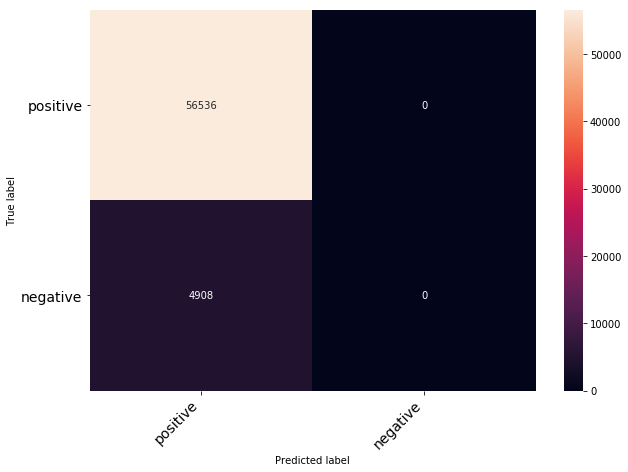

In [239]:
rf_cm_control = confusion_matrix(y_test_c, y_pred)
print_confusion_matrix(rf_cm_control)

In [240]:
confusion_matrix_metrics(rf_cm_control)

Recall:  0.0
Specificity:  1.0
False Positive Rate:  0.0
Precision:  0.0


In [241]:
classification_metrics(y_test_c, y_pred)

The area under the curve is 0.5

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56536
           1       0.00      0.00      0.00      4908

   micro avg       0.92      0.92      0.92     61444
   macro avg       0.46      0.50      0.48     61444
weighted avg       0.85      0.92      0.88     61444



/home/keithlaskay/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/keithlaskay/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/keithlaskay/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Modifing Random Forrest Classifier
* estimators = 1000
* depth = 5
* class weight: approved = 1, denied = 1.5

In [242]:
rf_control_5 = RandomForestClassifier(n_estimators=1000, max_depth=5, n_jobs=10,
                            class_weight={0:1, 1:1.5})

In [243]:
rf_control_5.fit(X_train_c, y_train_c)

RandomForestClassifier(bootstrap=True, class_weight={0: 1, 1: 1.5},
            criterion='gini', max_depth=5, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=10, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [244]:
y_pred = rf_control_5.predict(X_test_c)

In [245]:
rf_control_5.score(X_test_c, y_test_c)

0.9201223878653734

In [246]:
cross_val_score(rf_control_5, X_test_c, y_test_c, cv=10, n_jobs=10)

array([0.92009764, 0.92009764, 0.92009764, 0.92009764, 0.92009764,
       0.92009764, 0.92008464, 0.92008464, 0.92023441, 0.92023441])

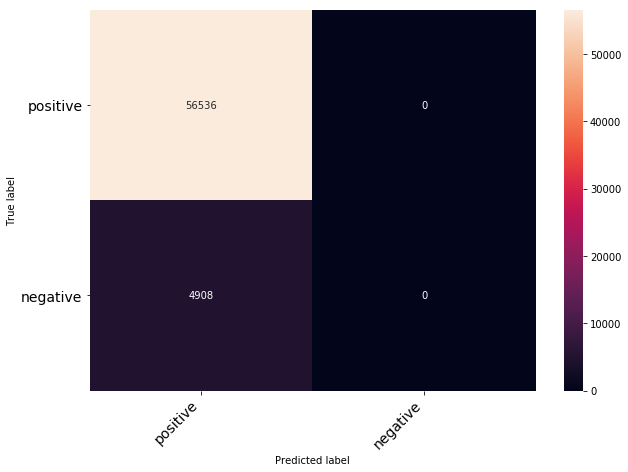

In [247]:
rf_cm_control5 = confusion_matrix(y_test_c, y_pred)
print_confusion_matrix(rf_cm_control5)

In [248]:
confusion_matrix_metrics(rf_cm_control5)

Recall:  0.0
Specificity:  1.0
False Positive Rate:  0.0
Precision:  0.0


In [249]:
classification_metrics(y_test_c, y_pred)

The area under the curve is 0.5

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56536
           1       0.00      0.00      0.00      4908

   micro avg       0.92      0.92      0.92     61444
   macro avg       0.46      0.50      0.48     61444
weighted avg       0.85      0.92      0.88     61444



/home/keithlaskay/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/keithlaskay/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/keithlaskay/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### Evaluating Random Forest with different depths

In [250]:
depth = list(range(2,11))
scores = []
type2_errors = []
for number in depth:
    rf = RandomForestClassifier(n_estimators=100, max_depth=number, n_jobs=10)
    rf.fit(X_train_c, y_train_c)
    y_pred = rf.predict(X_test_c)
    scores.append(rf.score(X_test_c, y_test_c))
    type2_errors.append(confusion_matrix(y_test_c, y_pred)[1][0])
    print('Depth: {};     Score: {};     total typeII error on test {} \n'.format(number,
                                                                                 rf.score(X_test_c, y_test_c),
                                                                                 confusion_matrix(y_test_c, y_pred)[1][0]))

Depth: 2;     Score: 0.9201223878653734;     total typeII error on test 4908 

Depth: 3;     Score: 0.9201223878653734;     total typeII error on test 4908 

Depth: 4;     Score: 0.9201223878653734;     total typeII error on test 4908 

Depth: 5;     Score: 0.9201223878653734;     total typeII error on test 4908 

Depth: 6;     Score: 0.9201223878653734;     total typeII error on test 4908 

Depth: 7;     Score: 0.9201223878653734;     total typeII error on test 4908 

Depth: 8;     Score: 0.9201223878653734;     total typeII error on test 4908 

Depth: 9;     Score: 0.9201223878653734;     total typeII error on test 4908 

Depth: 10;     Score: 0.9201223878653734;     total typeII error on test 4908 



#### Evaluating Random Forest with different depths

In [251]:
estimators = list(range(100, 1001,100))
scores2 = []
type2_errors2 = []
for number in estimators:
    rf = RandomForestClassifier(n_estimators=number, max_depth=5, n_jobs=10)
    rf.fit(X_train_c, y_train_c)
    y_pred = rf.predict(X_test_c)
    scores2.append(rf.score(X_test_c, y_test_c))
    type2_errors2.append(confusion_matrix(y_test_c, y_pred)[1][0])
    print('Estimators: {};     Score: {};     total typeII error on test {} \n'.format(number,
                                                                                 rf.score(X_test_c, y_test_c),
                                                                                 confusion_matrix(y_test_c, y_pred)[1][0]))

Estimators: 100;     Score: 0.9201223878653734;     total typeII error on test 4908 

Estimators: 200;     Score: 0.9201223878653734;     total typeII error on test 4908 

Estimators: 300;     Score: 0.9201223878653734;     total typeII error on test 4908 

Estimators: 400;     Score: 0.9201223878653734;     total typeII error on test 4908 

Estimators: 500;     Score: 0.9201223878653734;     total typeII error on test 4908 

Estimators: 600;     Score: 0.9201223878653734;     total typeII error on test 4908 

Estimators: 700;     Score: 0.9201223878653734;     total typeII error on test 4908 

Estimators: 800;     Score: 0.9201223878653734;     total typeII error on test 4908 

Estimators: 900;     Score: 0.9201223878653734;     total typeII error on test 4908 

Estimators: 1000;     Score: 0.9201223878653734;     total typeII error on test 4908 



### XGB Classifier with upsampled data

In [252]:
xg_up = XGBClassifier(n_jobs=10, n_estimators=1000)

In [253]:
xg_up.fit(X_train_up.values, y_train_up)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=10, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [254]:
y_pred = xg_up.predict(X_test_up.values)

In [255]:
xg_up.score(X_test_up.values, y_test_up)

0.950985686085317

In [256]:
cross_val_score(xg_up, X_test_up.values, y_test_up, cv=10, n_jobs=10)

array([0.95441671, 0.94875199, 0.95149584, 0.94927857, 0.95290368,
       0.94909703, 0.95113314, 0.94971671, 0.9490085 , 0.94874292])

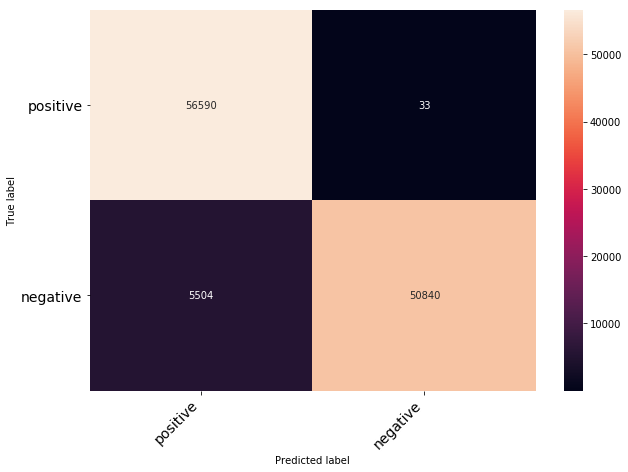

In [257]:
xg_cm_up = confusion_matrix(y_test_up, y_pred)
print_confusion_matrix(xg_cm_up)

In [258]:
confusion_matrix_metrics(xg_cm_up)

Recall:  0.902314354678404
Specificity:  0.9994171979584268
False Positive Rate:  0.0005828020415732123
Precision:  0.8978683573812761


In [259]:
classification_metrics(y_test_up, y_pred)

The area under the curve is 0.9508657763184154

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     56623
           1       1.00      0.90      0.95     56344

   micro avg       0.95      0.95      0.95    112967
   macro avg       0.96      0.95      0.95    112967
weighted avg       0.96      0.95      0.95    112967



### XGB Classifier with undersampled data

In [260]:
xg_under = XGBClassifier(n_jobs=10, n_estimators=1000)

In [261]:
xg_under.fit(X_train_down.values, y_train_down)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=10, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [262]:
y_pred = xg_under.predict(X_test_down.values)

In [263]:
xg_under.score(X_test_down.values, y_test_down)

0.6547596606974553

In [264]:
cross_val_score(xg_under, X_test_down.values, y_test_down, cv=10, n_jobs=10)

array([0.64184731, 0.59472196, 0.63524976, 0.64750236, 0.6267672 ,
       0.6399623 , 0.62582469, 0.66163996, 0.6135721 , 0.63807729])

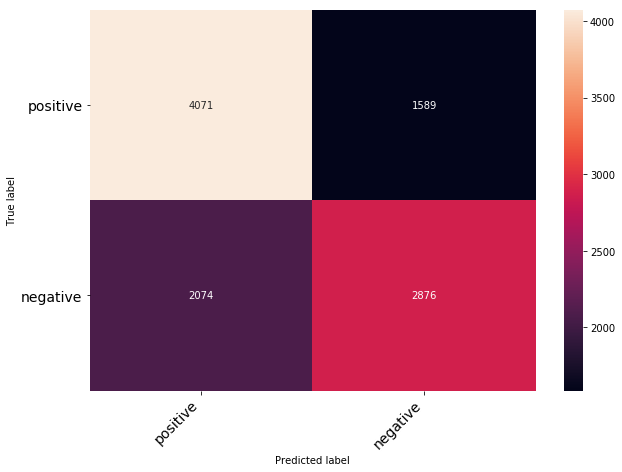

In [265]:
xg_cm_under = confusion_matrix(y_test_down, y_pred)
print_confusion_matrix(xg_cm_under)

In [266]:
confusion_matrix_metrics(xg_cm_under)

Recall:  0.581010101010101
Specificity:  0.7192579505300354
False Positive Rate:  0.28074204946996467
Precision:  0.5081272084805654


In [268]:
classification_metrics(y_test_down, y_pred)

The area under the curve is 0.6501340257700682

              precision    recall  f1-score   support

           0       0.66      0.72      0.69      5660
           1       0.64      0.58      0.61      4950

   micro avg       0.65      0.65      0.65     10610
   macro avg       0.65      0.65      0.65     10610
weighted avg       0.65      0.65      0.65     10610



### XGB Classifier with unweighted data

In [269]:
xg_control = XGBClassifier(n_jobs=10, n_estimators=1000)

In [270]:
xg_control.fit(X_train_c.values, y_train_c)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=10, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [271]:
y_pred = xg_control.predict(X_test_c.values)

In [272]:
xg_control.score(X_test_c.values, y_test_c)

0.9199921880085932

In [273]:
cross_val_score(xg_control, X_test_c.values, y_test_c, cv=10, n_jobs=10)

array([0.9194467 , 0.92058584, 0.91960944, 0.91928397, 0.9194467 ,
       0.9194467 , 0.91959635, 0.91927083, 0.91974605, 0.91990884])

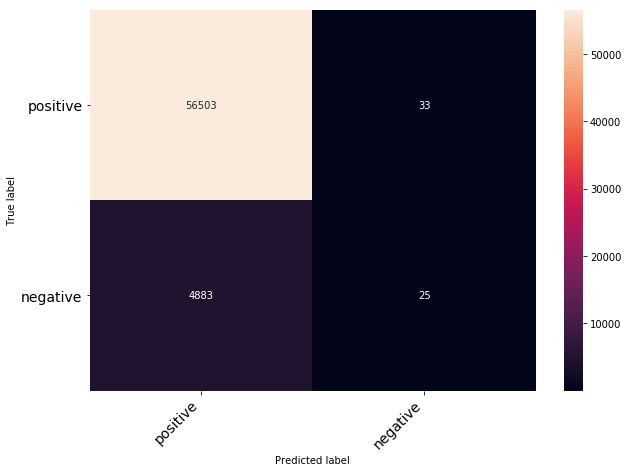

In [274]:
xg_cm_control = confusion_matrix(y_test_c, y_pred)
print_confusion_matrix(xg_cm_control)

In [275]:
confusion_matrix_metrics(xg_cm_control)

Recall:  0.005093724531377343
Specificity:  0.9994163011178718
False Positive Rate:  0.0005836988821282015
Precision:  0.0004421961228243951


In [276]:
classification_metrics(y_test_c, y_pred)

The area under the curve is 0.5022550128246246

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56536
           1       0.43      0.01      0.01      4908

   micro avg       0.92      0.92      0.92     61444
   macro avg       0.68      0.50      0.48     61444
weighted avg       0.88      0.92      0.88     61444



### Support Vector Machine as a Classifier with upsampled data

In [374]:
svm_up = SVC()

In [375]:
sc = StandardScaler()

In [376]:
X_train_norm_up = sc.fit_transform(X_train_up)
X_test_norm_up = sc.fit_transform(X_test_up)

In [377]:
svm_up.fit(X_train_norm_up, y_train_up)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [378]:
y_pred = svm_up.predict(X_test_norm_up)

In [379]:
svm_up.score(X_test_norm_up, y_test_up)

0.8311453787389238

In [380]:
cross_val_score(svm_up, X_test_norm_up, y_test_up, cv=10, n_jobs=10)

array([0.81297575, 0.80828465, 0.81687024, 0.81180844, 0.81329674,
       0.8148017 , 0.81728045, 0.81772309, 0.81276558, 0.81586402])

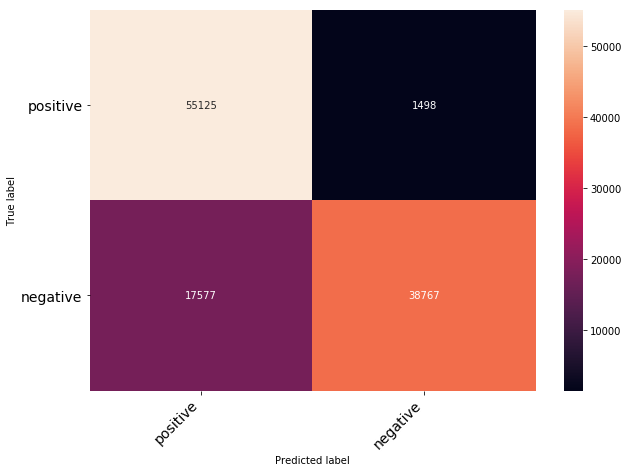

In [381]:
svm_cm_up = confusion_matrix(y_test_up, y_pred)
print_confusion_matrix(svm_cm_up)

In [382]:
confusion_matrix_metrics(svm_cm_up)

Recall:  0.6880413176203323
Specificity:  0.9735443194461615
False Positive Rate:  0.026455680553838547
Precision:  0.6846511135051128


In [384]:
classification_metrics(y_test_up, y_pred)

The area under the curve is 0.8307928185332469

              precision    recall  f1-score   support

           0       0.76      0.97      0.85     56623
           1       0.96      0.69      0.80     56344

   micro avg       0.83      0.83      0.83    112967
   macro avg       0.86      0.83      0.83    112967
weighted avg       0.86      0.83      0.83    112967



### Support Vector Machine as a Classifier with undersampled data

In [390]:
svm_under = SVC(gamma='auto')

In [387]:
X_train_norm_down = sc.fit_transform(X_train_down.values)
X_test_norm_down = sc.fit_transform(X_test_down.values)

In [391]:
svm_under.fit(X_train_norm_down, y_train_down)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [392]:
y_pred = svm_under.predict(X_test_norm_down)

In [393]:
svm_under.score(X_test_norm_down, y_test_down)

0.6442035815268614

In [394]:
cross_val_score(svm_under, X_test_norm_down, y_test_down, cv=10, n_jobs=10)

array([0.65504241, 0.61828464, 0.61451461, 0.64938737, 0.63619227,
       0.67295005, 0.63713478, 0.64467484, 0.61545712, 0.64844486])

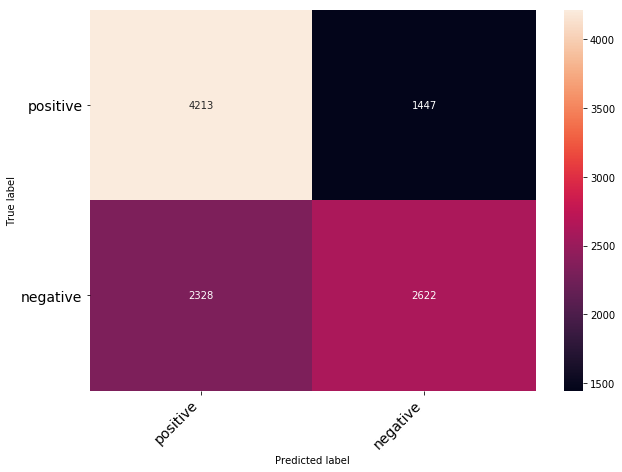

In [395]:
svm_cm_under = confusion_matrix(y_test_down, y_pred)
print_confusion_matrix(svm_cm_under)

In [396]:
confusion_matrix_metrics(svm_cm_under)

Recall:  0.5296969696969697
Specificity:  0.7443462897526502
False Positive Rate:  0.25565371024734984
Precision:  0.46325088339222614


In [398]:
classification_metrics(y_test_down, y_pred)

The area under the curve is 0.63702162972481

              precision    recall  f1-score   support

           0       0.64      0.74      0.69      5660
           1       0.64      0.53      0.58      4950

   micro avg       0.64      0.64      0.64     10610
   macro avg       0.64      0.64      0.64     10610
weighted avg       0.64      0.64      0.64     10610



### Support Vector Machine as a Classifier with unweighted data

In [399]:
svm_control = SVC(gamma='auto')

In [400]:
X_train_norm_c = sc.fit_transform(X_train_c.values)
X_test_norm_c = sc.fit_transform(X_test_c.values)

In [401]:
svm_control.fit(X_train_norm_c, y_train_c)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [402]:
y_pred = svm_control.predict(X_test_norm_c)

In [403]:
svm_control.score(X_test_norm_c, y_test_c)

0.9201223878653734

In [404]:
cross_val_score(svm_control, X_test_norm_c, y_test_c, cv=10, n_jobs=10)

array([0.92009764, 0.92009764, 0.92009764, 0.92009764, 0.92009764,
       0.92009764, 0.92008464, 0.92008464, 0.92023441, 0.92023441])

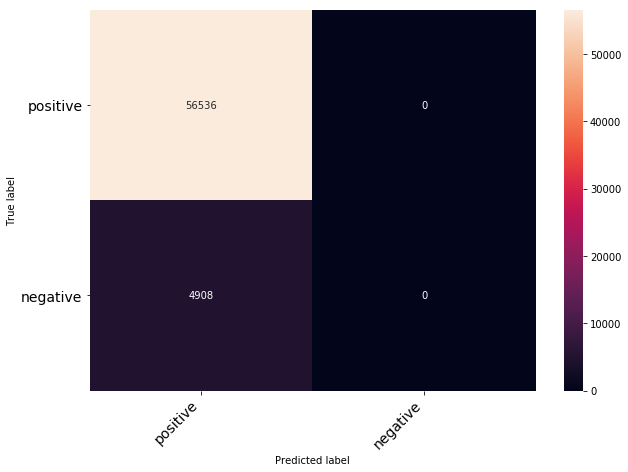

In [406]:
svm_cm_control = confusion_matrix(y_test_c, y_pred)
print_confusion_matrix(svm_cm_control)

In [407]:
confusion_matrix_metrics(svm_cm_control)

Recall:  0.0
Specificity:  1.0
False Positive Rate:  0.0
Precision:  0.0


In [408]:
classification_metrics(y_test_c, y_pred)

The area under the curve is 0.5

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56536
           1       0.00      0.00      0.00      4908

   micro avg       0.92      0.92      0.92     61444
   macro avg       0.46      0.50      0.48     61444
weighted avg       0.85      0.92      0.88     61444



/home/keithlaskay/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/keithlaskay/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/keithlaskay/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Voting Classifier with upsampled data

In [277]:
vc_up = VotingClassifier(estimators=[('tree_up', tree_up), 
                                     ('gb_up', gb_up),
                                     ('rf_up', rf_up),
                                     ('xg_up', xg_up)])

In [278]:
vc_up.fit(X_train_up.values, y_train_up)

VotingClassifier(estimators=[('tree_up', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_l...tate=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

In [279]:
y_pred = vc_up.predict(X_test_up.values)

In [280]:
vc_up.score(X_test_up.values, y_test_up)

0.9242876238193455

In [281]:
cross_val_score(vc_up, X_test_up.values, y_test_up, cv =10, n_jobs=10)

array([0.92565056, 0.9220216 , 0.92396884, 0.92635213, 0.92174221,
       0.91970609, 0.92386686, 0.92218484, 0.92209632, 0.92510623])

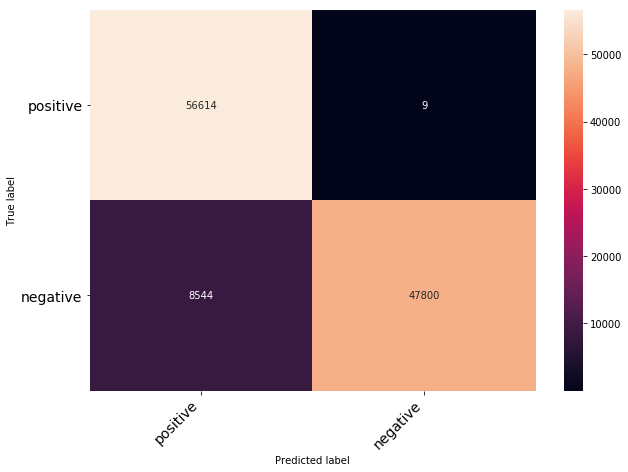

In [282]:
vc_cm_up = confusion_matrix(y_test_up, y_pred)
print_confusion_matrix(vc_cm_up)

In [283]:
confusion_matrix_metrics(vc_cm_up)

Recall:  0.8483600738321738
Specificity:  0.9998410539886619
False Positive Rate:  0.0001589460113381488
Precision:  0.8441799268848348


In [284]:
classification_metrics(y_test_up, y_pred)

The area under the curve is 0.9241005639104178

              precision    recall  f1-score   support

           0       0.87      1.00      0.93     56623
           1       1.00      0.85      0.92     56344

   micro avg       0.92      0.92      0.92    112967
   macro avg       0.93      0.92      0.92    112967
weighted avg       0.93      0.92      0.92    112967



### Voting Classifier with undersampled data

In [285]:
vc_under = VotingClassifier(estimators=[('tree_under', tree_under), 
                                        ('gb_under', gb_under),
                                        ('rf_under', rf_under), 
                                        ('xg_under', xg_under)])

In [286]:
vc_under.fit(X_train_down.values, y_train_down)

VotingClassifier(estimators=[('tree_under', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fractio...tate=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

In [287]:
y_pred = vc_under.predict(X_test_down.values)

In [288]:
vc_under.score(X_test_down.values, y_test_down)

0.6575871819038642

In [289]:
cross_val_score(vc_under, X_test_down.values, y_test_down, cv =10, n_jobs=10)

array([0.65598492, 0.63619227, 0.63430726, 0.65504241, 0.64655985,
       0.667295  , 0.64561734, 0.66446748, 0.62488219, 0.65881244])

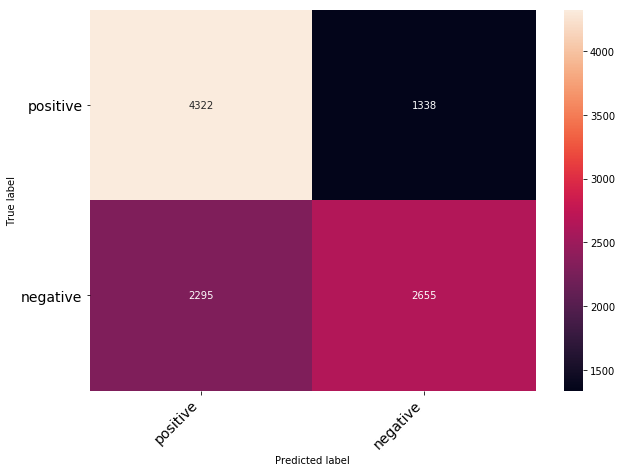

In [290]:
vc_cm_under = confusion_matrix(y_test_down, y_pred)
print_confusion_matrix(vc_cm_under)

In [291]:
confusion_matrix_metrics(vc_cm_under)

Recall:  0.5363636363636364
Specificity:  0.7636042402826855
False Positive Rate:  0.2363957597173145
Precision:  0.46908127208480566


In [292]:
classification_metrics(y_test_down, y_pred)

The area under the curve is 0.6499839383231609

              precision    recall  f1-score   support

           0       0.65      0.76      0.70      5660
           1       0.66      0.54      0.59      4950

   micro avg       0.66      0.66      0.66     10610
   macro avg       0.66      0.65      0.65     10610
weighted avg       0.66      0.66      0.65     10610



### Voting Classifier with unweighted data

In [293]:
vc_control = VotingClassifier(estimators=[('tree_control', tree_control),
                                          ('gb_control', gb_control),
                                          ('rf_control', rf_control),
                                          ('xg_control', xg_control)])

In [294]:
vc_control.fit(X_train_c.values, y_train_c)

VotingClassifier(estimators=[('tree_control', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fract...tate=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

In [295]:
y_pred = vc_control.predict(X_test_c.values)

In [296]:
vc_control.score(X_test_c.values, y_test_c)

0.9202037627758609

In [297]:
cross_val_score(vc_control, X_test_c.values, y_test_c, cv =10, n_jobs=10)

array([0.92026037, 0.92042311, 0.91993491, 0.91977217, 0.92009764,
       0.92009764, 0.92008464, 0.92008464, 0.92023441, 0.9203972 ])

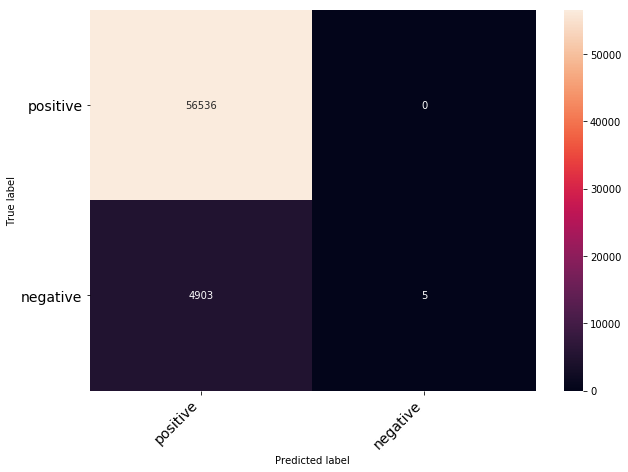

In [298]:
vc_cm_control = confusion_matrix(y_test_c, y_pred)
print_confusion_matrix(vc_cm_control)

In [299]:
confusion_matrix_metrics(vc_cm_control)

Recall:  0.0010187449062754685
Specificity:  1.0
False Positive Rate:  0.0
Precision:  8.843922456487902e-05


In [300]:
classification_metrics(y_test_c, y_pred)

The area under the curve is 0.5005093724531378

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56536
           1       1.00      0.00      0.00      4908

   micro avg       0.92      0.92      0.92     61444
   macro avg       0.96      0.50      0.48     61444
weighted avg       0.93      0.92      0.88     61444



## Using PCA on upsampled data with various models

In [301]:
pca = PCA(n_components=10)

In [302]:
pca_X_train = pca.fit_transform(X_train_up)
pca_X_test = pca.fit_transform(X_test_up)

### Logistic Regression with PCA and upsampling

In [303]:
log_up.fit(pca_X_train, y_train_up)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [304]:
y_pred = log_up.predict(pca_X_test)

In [305]:
log_up.score(pca_X_test, y_test_up)

0.5870121362875884

In [306]:
cross_val_score(log_up, pca_X_test, y_test_up, cv=10, n_jobs=10)

array([0.58452824, 0.58284652, 0.58948486, 0.59095335, 0.58728754,
       0.58932365, 0.58383499, 0.58631374, 0.5881728 , 0.59419263])

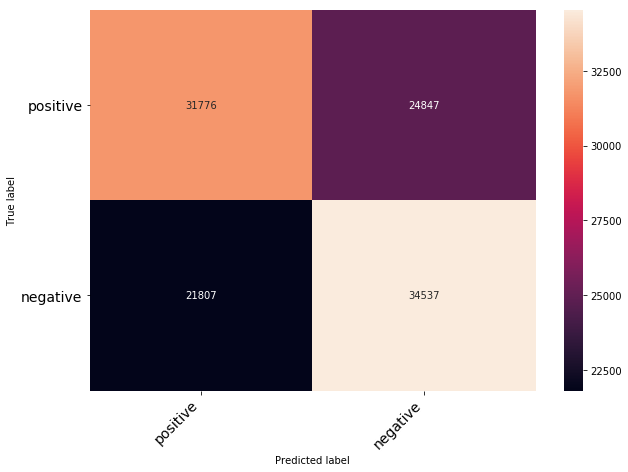

In [307]:
pca_log_cm = confusion_matrix(y_test_up, y_pred)
print_confusion_matrix(pca_log_cm)

In [308]:
confusion_matrix_metrics(pca_log_cm)

Recall:  0.6129667755217947
Specificity:  0.5611853840312241
False Positive Rate:  0.4388146159687759
Precision:  0.6099464881761828


In [309]:
classification_metrics(y_test_up, y_pred)

The area under the curve is 0.5870760797765093

              precision    recall  f1-score   support

           0       0.59      0.56      0.58     56623
           1       0.58      0.61      0.60     56344

   micro avg       0.59      0.59      0.59    112967
   macro avg       0.59      0.59      0.59    112967
weighted avg       0.59      0.59      0.59    112967



### KNN Classifier with PCA and upsampling

In [312]:
for num in ks:
    neighbor = KNeighborsClassifier(n_neighbors=num, n_jobs=10)
    neighbor.fit(pca_X_train, y_train_up)
    print('For {} neighbors the score is {}'.format(num, neighbor.score(pca_X_test,
                                                                        y_test_up)))
    print('Cross val mean is {} with a standard deviation of {} \n'.format(
        cross_val_score(neighbor, X_test_c, y_test_c, cv=10, n_jobs=10).mean(), 
        cross_val_score(neighbor, X_test_c, y_test_c, cv=10, n_jobs=10).std()))

For 2 neighbors the score is 0.5190896456487293
Cross val mean is 0.9138238544245325 with a standard deviation of 0.0014112810983814919 

For 3 neighbors the score is 0.5273575468942258
Cross val mean is 0.9022685162763497 with a standard deviation of 0.002502613077768877 

For 4 neighbors the score is 0.525551709791355
Cross val mean is 0.9175997478177427 with a standard deviation of 0.0006927632533481414 

For 5 neighbors the score is 0.5287030725787176
Cross val mean is 0.9145888336957165 with a standard deviation of 0.000975776928228374 

For 6 neighbors the score is 0.5254100755087769
Cross val mean is 0.9192110123998092 with a standard deviation of 0.0002953360205430068 

For 7 neighbors the score is 0.5298184425540202
Cross val mean is 0.9177462295501149 with a standard deviation of 0.0008474220747081978 

For 8 neighbors the score is 0.5264457762001292
Cross val mean is 0.91969924597644 with a standard deviation of 0.00034098738297816915 

For 9 neighbors the score is 0.5307479

### Decision Tree Classifier with PCA and upsampling

In [313]:
tree = DecisionTreeClassifier(max_depth=10)

In [314]:
tree.fit(pca_X_train, y_train_up)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [315]:
y_pred = tree.predict(pca_X_test)

In [316]:
tree.score(pca_X_test, y_test_up)

0.7876370975594643

In [317]:
cross_val_score(tree, pca_X_test, y_test_up, cv=10, n_jobs=10)

array([0.83138609, 0.82253496, 0.83032395, 0.8278304 , 0.83126771,
       0.82870042, 0.83604816, 0.82923159, 0.83082507, 0.83268414])

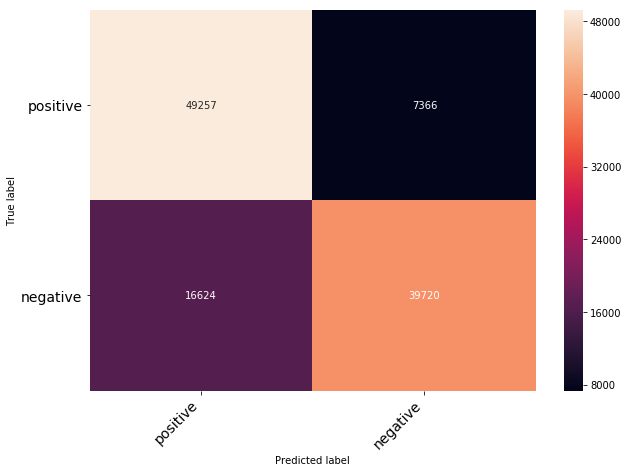

In [318]:
pca_dt_cm = confusion_matrix(y_test_up, y_pred)
print_confusion_matrix(pca_dt_cm)

In [319]:
confusion_matrix_metrics(pca_dt_cm)

Recall:  0.7049552747408775
Specificity:  0.8699115200536884
False Positive Rate:  0.13008847994631156
Precision:  0.70148173003903


In [320]:
classification_metrics(y_test_up, y_pred)

The area under the curve is 0.787433397397283

              precision    recall  f1-score   support

           0       0.75      0.87      0.80     56623
           1       0.84      0.70      0.77     56344

   micro avg       0.79      0.79      0.79    112967
   macro avg       0.80      0.79      0.79    112967
weighted avg       0.80      0.79      0.79    112967



### Random Forest Classifier with PCA and upsampling

In [321]:
rf = RandomForestClassifier(n_estimators=500, max_depth=5, n_jobs=10)

In [322]:
rf.fit(pca_X_train, y_train_up)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=10,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [323]:
y_pred = rf.predict(pca_X_test) 

In [324]:
rf.score(pca_X_test, y_test_up)

0.7351527437216178

In [325]:
cross_val_score(rf, pca_X_test, y_test_up, cv=10, n_jobs=10)

array([0.74597274, 0.74685785, 0.74862808, 0.74178986, 0.75256728,
       0.75177054, 0.74955737, 0.75779037, 0.75194759, 0.74716714])

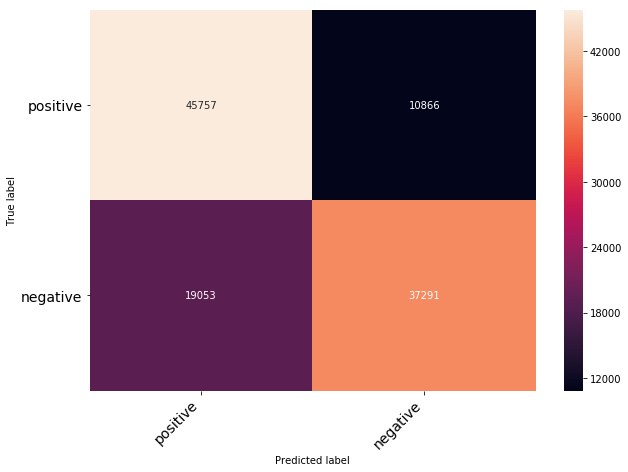

In [326]:
pca_rf_cm = confusion_matrix(y_test_up, y_pred)
print_confusion_matrix(pca_rf_cm)

In [327]:
confusion_matrix_metrics(pca_rf_cm)

Recall:  0.6618450944199915
Specificity:  0.808099182311075
False Positive Rate:  0.191900817688925
Precision:  0.6585839676456564


In [328]:
classification_metrics(y_test_up, y_pred)

The area under the curve is 0.7349721383655332

              precision    recall  f1-score   support

           0       0.71      0.81      0.75     56623
           1       0.77      0.66      0.71     56344

   micro avg       0.74      0.74      0.74    112967
   macro avg       0.74      0.73      0.73    112967
weighted avg       0.74      0.74      0.73    112967



### Gradient Boosting Classifier with PCA and upsampling

In [338]:
gb = GradientBoostingClassifier(n_estimators=500)

In [339]:
gb.fit(pca_X_train, y_train_up)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=500,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [340]:
y_pred = gb.predict(pca_X_test)

In [341]:
gb.score(pca_X_test, y_test_up)

0.8203103561216992

In [342]:
cross_val_score(gb_up, pca_X_test, y_test_up, cv=10, n_jobs=10)

array([0.85439901, 0.84501682, 0.8559037 , 0.85146499, 0.85685198,
       0.8496813 , 0.85800283, 0.85915368, 0.85552408, 0.85747167])

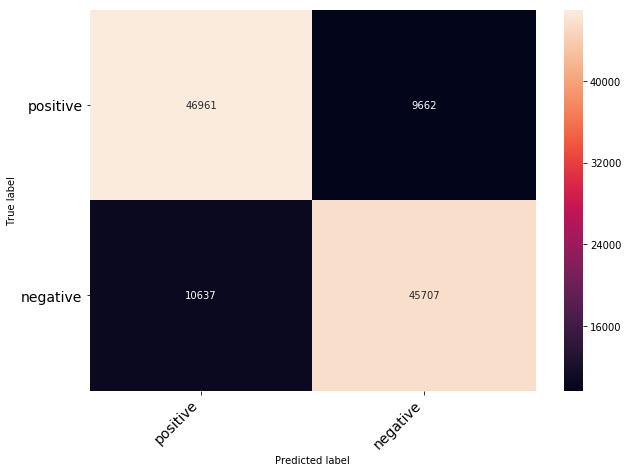

In [343]:
pca_gb_cm = confusion_matrix(y_test_up, y_pred)
print_confusion_matrix(pca_gb_cm)

In [344]:
confusion_matrix_metrics(pca_xg_cm)

Recall:  0.8111955132755928
Specificity:  0.8294862511700193
False Positive Rate:  0.17051374882998074
Precision:  0.8071984882468255


In [345]:
classification_metrics(y_test_up, y_pred)

The area under the curve is 0.8202879439444131

              precision    recall  f1-score   support

           0       0.82      0.83      0.82     56623
           1       0.83      0.81      0.82     56344

   micro avg       0.82      0.82      0.82    112967
   macro avg       0.82      0.82      0.82    112967
weighted avg       0.82      0.82      0.82    112967



### XGB Classifier with PCA and upsampling

In [346]:
xg = XGBClassifier(n_jobs=10, n_estimators=1000)

In [347]:
xg.fit(pca_X_train, y_train_up)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=10, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [348]:
y_pred = xg.predict(pca_X_test)

In [349]:
xg.score(pca_X_test, y_test_up)

0.7990032487363566

In [350]:
cross_val_score(xg, pca_X_test, y_test_up, cv=10, n_jobs=10)

array([0.90378828, 0.89626483, 0.90228359, 0.9006816 , 0.90359419,
       0.89757436, 0.9026204 , 0.90129249, 0.90058428, 0.90217776])

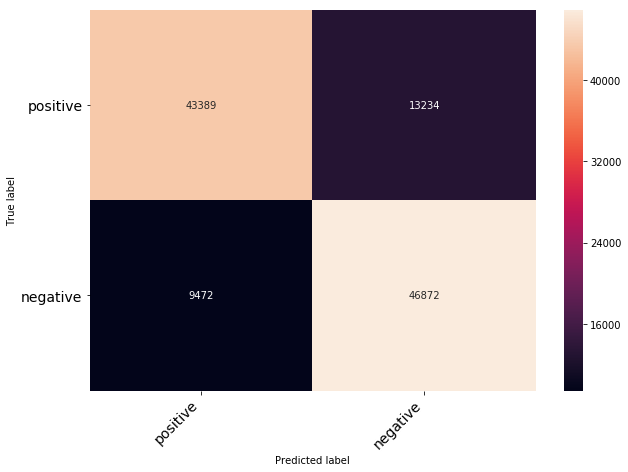

In [351]:
pca_xg_cm = confusion_matrix(y_test_up, y_pred)
print_confusion_matrix(pca_xg_cm)

In [352]:
confusion_matrix_metrics(pca_xg_cm)

Recall:  0.831889819679114
Specificity:  0.7662787206612154
False Positive Rate:  0.2337212793387846
Precision:  0.827790827049079


In [353]:
classification_metrics(y_test_up, y_pred)

The area under the curve is 0.7990842701701647

              precision    recall  f1-score   support

           0       0.82      0.77      0.79     56623
           1       0.78      0.83      0.81     56344

   micro avg       0.80      0.80      0.80    112967
   macro avg       0.80      0.80      0.80    112967
weighted avg       0.80      0.80      0.80    112967



### Support Vector Machine Classifier with PCA and upsampling

In [409]:
svm_up = SVC(gamma='auto')

In [410]:
svm_up.fit(pca_X_train, y_train_up)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [411]:
y_pred = svm_up.predict(pca_X_test)

In [412]:
svm_up.score(pca_X_test, y_test_up)

0.5012348739012278

In [413]:
cross_val_score(svm_up, pca_X_test, y_test_up, cv=10, n_jobs=10)

array([0.50593025, 0.50495663, 0.50504514, 0.50570948, 0.50469193,
       0.50681657, 0.50513456, 0.50469193, 0.50584278, 0.50717068])

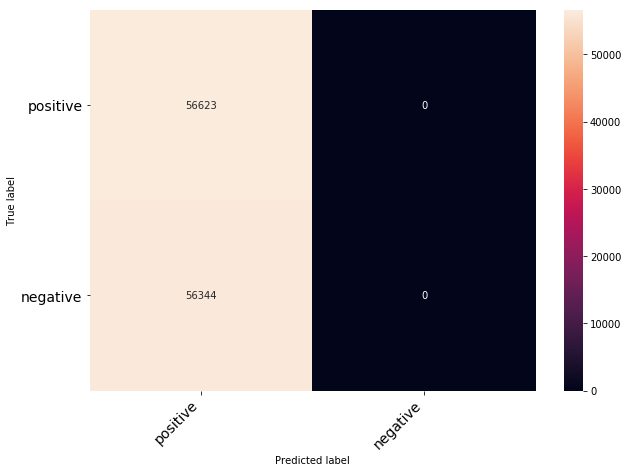

In [415]:
pca_svm_cm = confusion_matrix(y_test_up, y_pred)
print_confusion_matrix(pca_svm_cm)

In [417]:
confusion_matrix_metrics(pca_svm_cm)

Recall:  0.0
Specificity:  1.0
False Positive Rate:  0.0
Precision:  0.0


In [418]:
classification_metrics(y_test_up, y_pred)

The area under the curve is 0.5

              precision    recall  f1-score   support

           0       0.50      1.00      0.67     56623
           1       0.00      0.00      0.00     56344

   micro avg       0.50      0.50      0.50    112967
   macro avg       0.25      0.50      0.33    112967
weighted avg       0.25      0.50      0.33    112967



/home/keithlaskay/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/keithlaskay/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/keithlaskay/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Voting Classifier with PCA and upsampling

In [354]:
vc = VotingClassifier(estimators=[('tree', tree),
                                  ('gb', gb), 
                                  ('rf',rf),
                                  ('xg', xg)])

In [355]:
vc.fit(pca_X_train, y_train_up)

VotingClassifier(estimators=[('tree', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf...tate=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

In [356]:
y_pred = vc.predict(pca_X_test)

In [357]:
vc.score(pca_X_test, y_test_up)

0.8211955703878123

In [358]:
cross_val_score(vc, pca_X_test, y_test_up, cv=10, n_jobs=10)

array([0.862188  , 0.85696583, 0.86723314, 0.86270691, 0.86358003,
       0.86092422, 0.86667847, 0.86535057, 0.86614731, 0.86322592])

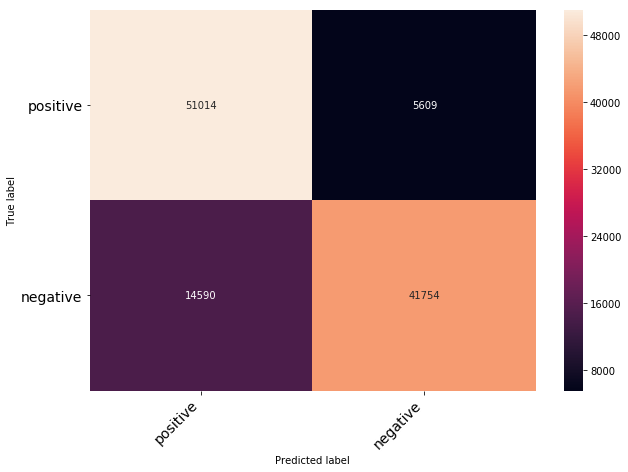

In [359]:
pca_vc_cm = confusion_matrix(y_test_up, y_pred)
print_confusion_matrix(pca_vc_cm)

In [360]:
confusion_matrix_metrics(pca_vc_cm)

Recall:  0.7410549481754934
Specificity:  0.9009413136004804
False Positive Rate:  0.09905868639951963
Precision:  0.7374035286014518


In [361]:
classification_metrics(y_test_up, y_pred)

The area under the curve is 0.8209981308879869

              precision    recall  f1-score   support

           0       0.78      0.90      0.83     56623
           1       0.88      0.74      0.81     56344

   micro avg       0.82      0.82      0.82    112967
   macro avg       0.83      0.82      0.82    112967
weighted avg       0.83      0.82      0.82    112967



### Conclusion

The XG Boost show good potential but I would further evaluation before the model is deployed to production. 

* Evaluate the model against a holdout group

* Continued modification of Gradient Boost via Gridsearch 

* Modify SMOTE to better balance upsampling and downsampling

* Further evaluation of Voting Classifier using Weighted Random Forest

### Further Research

Depending on how the model is to be implemented, the features need to be checked ta avoid some factors which may not be allowed such as age and gender. 

#### Resources

* https://www.kaggle.com/c/home-credit-default-risk
* http://www.homecredit.net/about-us.aspx


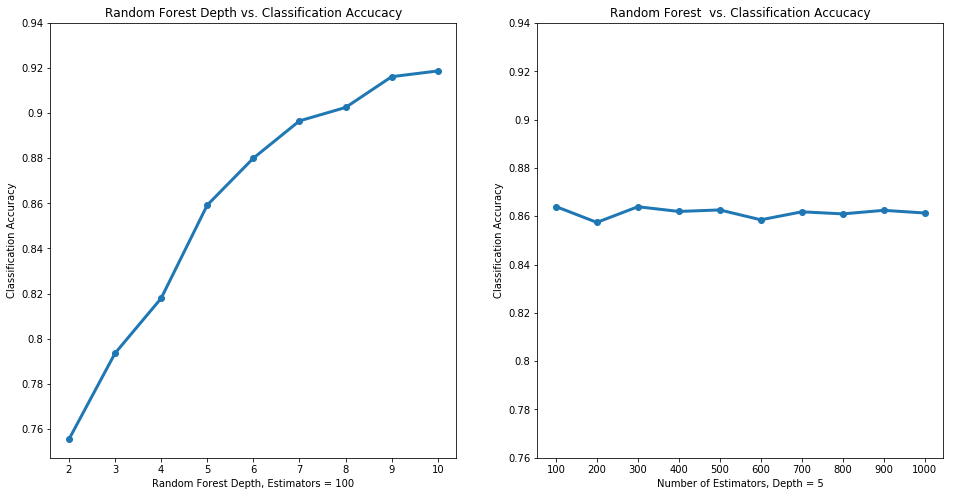

In [419]:
tick_val = list(range(76, 96, 2))
tick_val_dec = [number / 100 for number in tick_val]
tick_lab = [number for number in tick_val_dec] 

plt.figure(figsize=(16,8))
plt.subplot(1, 2, 1)
plt.plot(depth, scores_up, linewidth=3, marker='o')
plt.title('Random Forest Depth vs. Classification Accucacy')
plt.xlabel('Random Forest Depth, Estimators = 100')
plt.ylabel('Classification Accuracy')
plt.yticks(tick_val_dec, tick_lab)

plt.subplot(1, 2, 2)
plt.plot(estimators, scores2_up, linewidth=3, marker='o')
plt.title('Random Forest  vs. Classification Accucacy')
plt.xlabel('Number of Estimators, Depth = 5')
plt.ylabel('Classification Accuracy')
plt.yticks(tick_val_dec, tick_lab)
plt.xticks(estimators);

In [362]:
rates = gb_up.feature_importances_

In [363]:
cols = X_test_up.columns

In [364]:
for rate, col in zip(rates, cols):
    print(col, rate)

NAME_CONTRACT_TYPE 0.0026382929679716763
CODE_GENDER 0.28694305057011815
CNT_CHILDREN 0.133518082655572
AMT_INCOME_TOTAL 6.171530607056557e-05
AMT_CREDIT 0.0005607585654451507
AMT_GOODS_PRICE 0.001201539780950919
DAYS_BIRTH 0.002307914355716863
DAYS_EMPLOYED 0.0026122676615697215
REGION_RATING_CLIENT 0.12885299741936354
REG_CITY_NOT_LIVE_CITY 0.03168590906584437
EXT_SOURCE_2 0.09599454236191124
OBS_30_CNT_SOCIAL_CIRCLE 0.12413102597907227
FLAG_TOTAL 0.16399715422620298
NAME_INCOME_TYPE_Businessman 0.0
NAME_EDUCATION_TYPE_Academic degree 0.0
NAME_FAMILY_STATUS_Civil marriage 0.025494749084190665
NAME_HOUSING_TYPE_Co-op apartment 0.0


In [365]:
importance = [(col, rate) for col, rate in zip(cols, rates)]

In [366]:
importance

[('NAME_CONTRACT_TYPE', 0.0026382929679716763),
 ('CODE_GENDER', 0.28694305057011815),
 ('CNT_CHILDREN', 0.133518082655572),
 ('AMT_INCOME_TOTAL', 6.171530607056557e-05),
 ('AMT_CREDIT', 0.0005607585654451507),
 ('AMT_GOODS_PRICE', 0.001201539780950919),
 ('DAYS_BIRTH', 0.002307914355716863),
 ('DAYS_EMPLOYED', 0.0026122676615697215),
 ('REGION_RATING_CLIENT', 0.12885299741936354),
 ('REG_CITY_NOT_LIVE_CITY', 0.03168590906584437),
 ('EXT_SOURCE_2', 0.09599454236191124),
 ('OBS_30_CNT_SOCIAL_CIRCLE', 0.12413102597907227),
 ('FLAG_TOTAL', 0.16399715422620298),
 ('NAME_INCOME_TYPE_Businessman', 0.0),
 ('NAME_EDUCATION_TYPE_Academic degree', 0.0),
 ('NAME_FAMILY_STATUS_Civil marriage', 0.025494749084190665),
 ('NAME_HOUSING_TYPE_Co-op apartment', 0.0)]

In [367]:
imp = pd.DataFrame(importance)

In [368]:
imp

,0,1
0,NAME_CONTRACT_TYPE,0.002638
1,CODE_GENDER,0.286943
2,CNT_CHILDREN,0.133518
3,AMT_INCOME_TOTAL,0.000062
4,AMT_CREDIT,0.000561
5,AMT_GOODS_PRICE,0.001202
6,DAYS_BIRTH,0.002308
7,DAYS_EMPLOYED,0.002612
8,REGION_RATING_CLIENT,0.128853
9,REG_CITY_NOT_LIVE_CITY,0.031686


In [369]:
imp.rename(columns={0:'feature', 1:'importance'}, inplace=True)

In [370]:
imp.sort_values(by=['importance'], ascending=False)

,feature,importance
1,CODE_GENDER,0.286943
12,FLAG_TOTAL,0.163997
2,CNT_CHILDREN,0.133518
8,REGION_RATING_CLIENT,0.128853
11,OBS_30_CNT_SOCIAL_CIRCLE,0.124131
10,EXT_SOURCE_2,0.095995
9,REG_CITY_NOT_LIVE_CITY,0.031686
15,NAME_FAMILY_STATUS_Civil marriage,0.025495
0,NAME_CONTRACT_TYPE,0.002638
7,DAYS_EMPLOYED,0.002612


In [372]:
cross_val_score(gb_up, X_test_up, y_test_up, cv=10, n_jobs=10, scoring='roc_auc').mean()

0.9665363147787784

In [373]:
y_pred = gb_up.predict(X_test_up)
y_pred_prob = gb_up.predict_proba(X_test_up)